In [34]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from pathlib import Path
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')


In [35]:
# Function to load cleaned data
def load_cleaned_data(input_file):
    cleaned_data = pd.read_csv(f'../clean_data/clean_{input_file}')
    cleaned_data['Date'] = pd.to_datetime(cleaned_data['Date'])  # Ensure the 'Date' is datetime type
    cleaned_data.set_index('Date', inplace=True)  # Set 'Date' as index
    return cleaned_data


In [36]:
def plot_close_price(data, input_file):
    plt.figure(figsize=(14, 8))
    plt.plot(data['Close'], label='Close Price', color='blue')
    plt.title(f'{input_file.split(".")[0]} - Stock Price Over Time', fontsize=18)
    plt.xlabel('Time', fontsize=14)
    plt.ylabel('Stock Price (USD)', fontsize=14)
    plt.legend()
    plt.grid(True)
    plt.show()


In [37]:
def plot_moving_averages(data, input_file):
    data['MA20'] = data['Close'].rolling(window=20).mean()
    data['MA50'] = data['Close'].rolling(window=50).mean()
    
    plt.figure(figsize=(14, 8))
    plt.plot(data['Close'], label='Close Price', color='blue')
    plt.plot(data['MA20'], label='20-Day MA', color='red', linestyle='--')
    plt.plot(data['MA50'], label='50-Day MA', color='green', linestyle='--')
    plt.title(f'{input_file.split(".")[0]} - Moving Averages', fontsize=18)
    plt.xlabel('Time', fontsize=14)
    plt.ylabel('Stock Price (USD)', fontsize=14)
    plt.legend()
    plt.grid(True)
    plt.show()


In [38]:
def plot_volume_traded(data, input_file):
    plt.figure(figsize=(14, 8))
    plt.bar(data.index, data['Volume'], color='orange')
    plt.title(f'{input_file.split(".")[0]} - Trading Volume', fontsize=18)
    plt.xlabel('Time', fontsize=14)
    plt.ylabel('Trading Volume', fontsize=14)
    plt.grid(True)
    plt.show()


In [39]:
def plot_volatility(data, input_file):
    data['Volatility'] = data['High'] - data['Low']
    
    plt.figure(figsize=(14, 8))
    plt.plot(data['Volatility'], label='Volatility (High - Low)', color='purple')
    plt.title(f'{input_file.split(".")[0]} - Volatility over Time', fontsize=18)
    plt.xlabel('Time', fontsize=14)
    plt.ylabel('Volatility (USD)', fontsize=14)
    plt.legend()
    plt.grid(True)
    plt.show()


In [40]:
def plot_correlation_heatmap(data, input_file):
    plt.figure(figsize=(10, 8))
    correlation_matrix = data.corr()  # Compute the correlation matrix
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title(f'{input_file.split(".")[0]} - Heatmap - Correlation Matrix Between Variables', fontsize=18)
    plt.show()


In [41]:
def perform_eda(input_file):
    # Load cleaned data
    data = load_cleaned_data(input_file)
    
    # Show general statistics and basic info
    print(f"\nEDA for {input_file}:")
    print(data.describe())  # Summary statistics
    print(data.info())  # Data types and null values
    
    # Call the plotting functions for different charts
    plot_correlation_heatmap(data, input_file)
    plot_close_price(data, input_file)
    plot_moving_averages(data, input_file)
    plot_volume_traded(data, input_file)
    plot_volatility(data, input_file)
    


EDA for dataAMZN.csv:
              Open         High          Low        Close        Volume
count  2243.000000  2243.000000  2243.000000  2243.000000  2.243000e+03
mean    108.800184   110.036165   107.444381   108.770303  7.653963e+07
std      49.208913    49.768645    48.589571    49.174607  3.947083e+07
min      23.900499    24.674999    23.700001    24.103500  1.762600e+07
25%      74.224998    75.574249    72.948750    74.713249  5.103065e+07
50%      99.089996   100.510002    97.913002    99.281502  6.565520e+07
75%     156.750252   158.650749   154.500000   156.336250  9.104200e+07
max     214.160004   215.899994   210.880005   214.100006  3.313000e+08
<class 'pandas.core.frame.DataFrame'>
Index: 2243 entries, 2016-01-04 00:00:00-05:00 to 2024-11-29 00:00:00-05:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2243 non-null   float64
 1   High    2243 non-null   float64
 2   Low     2243 non-null   float6

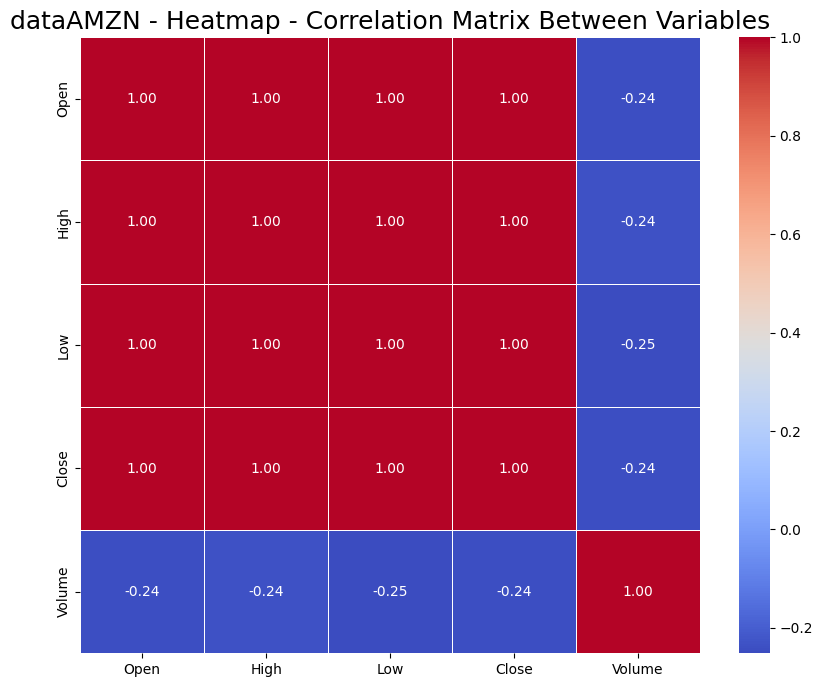

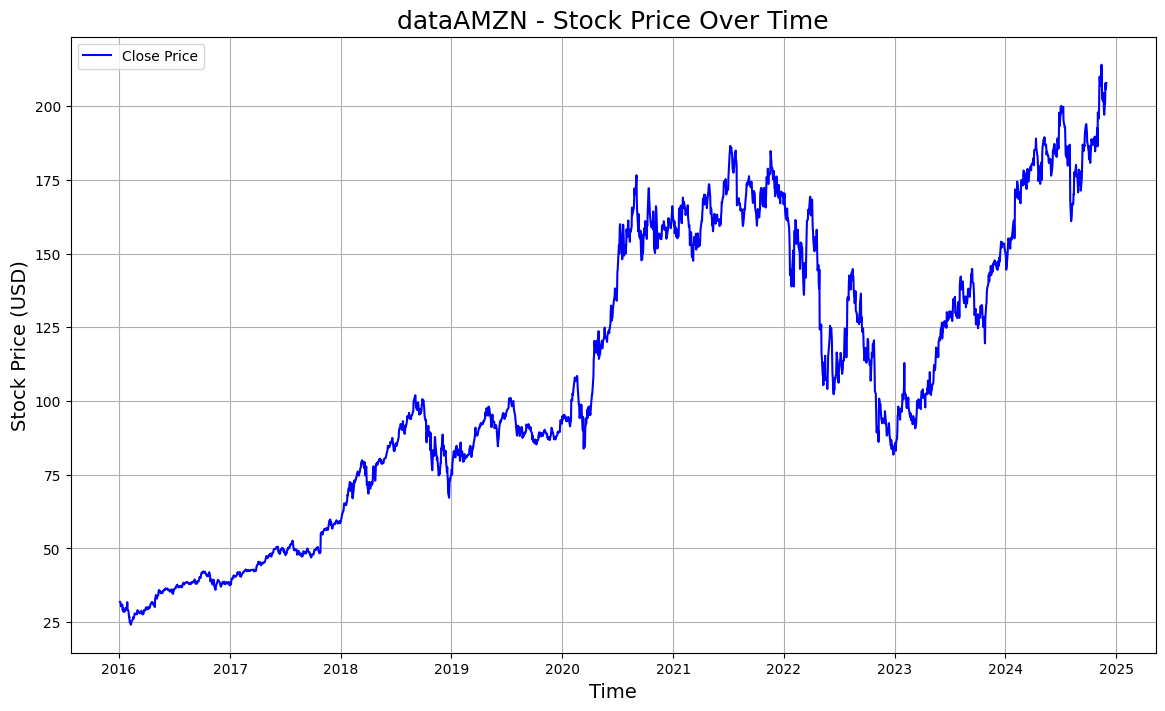

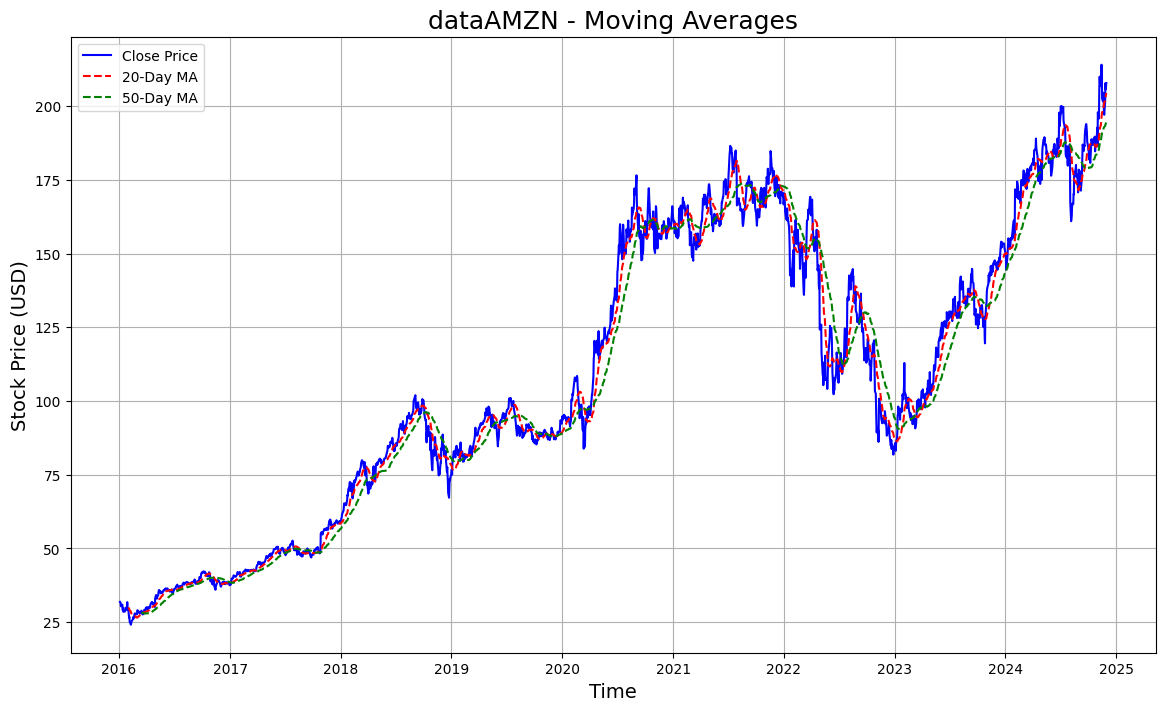

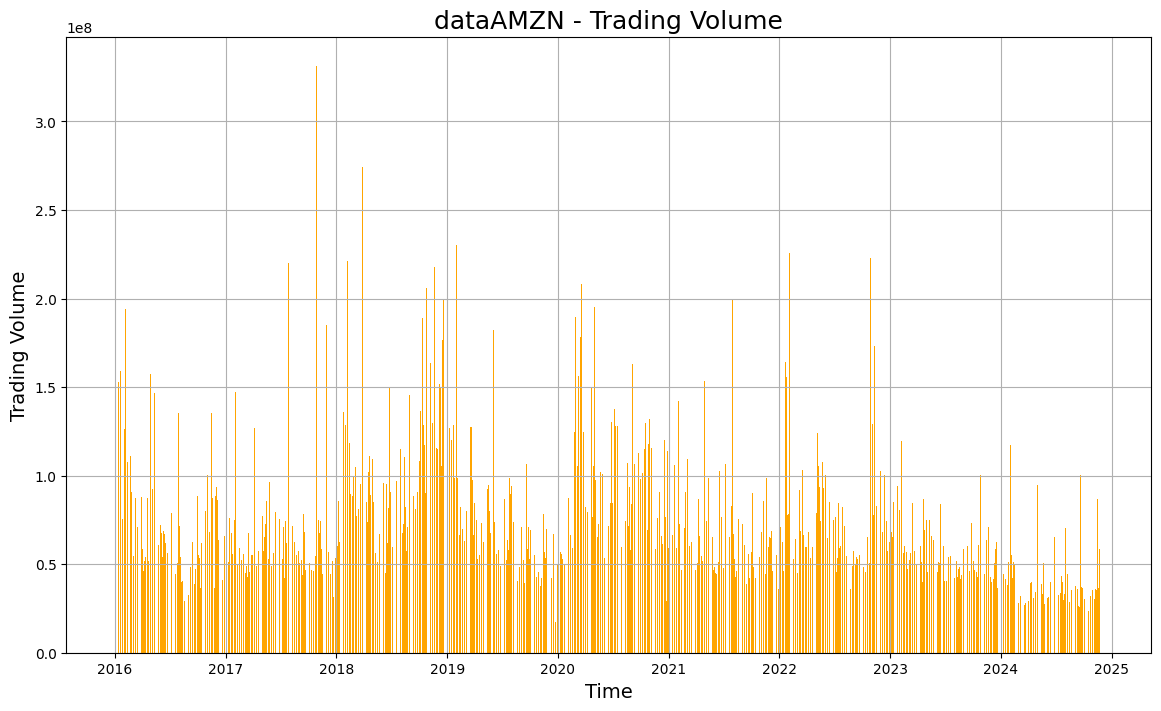

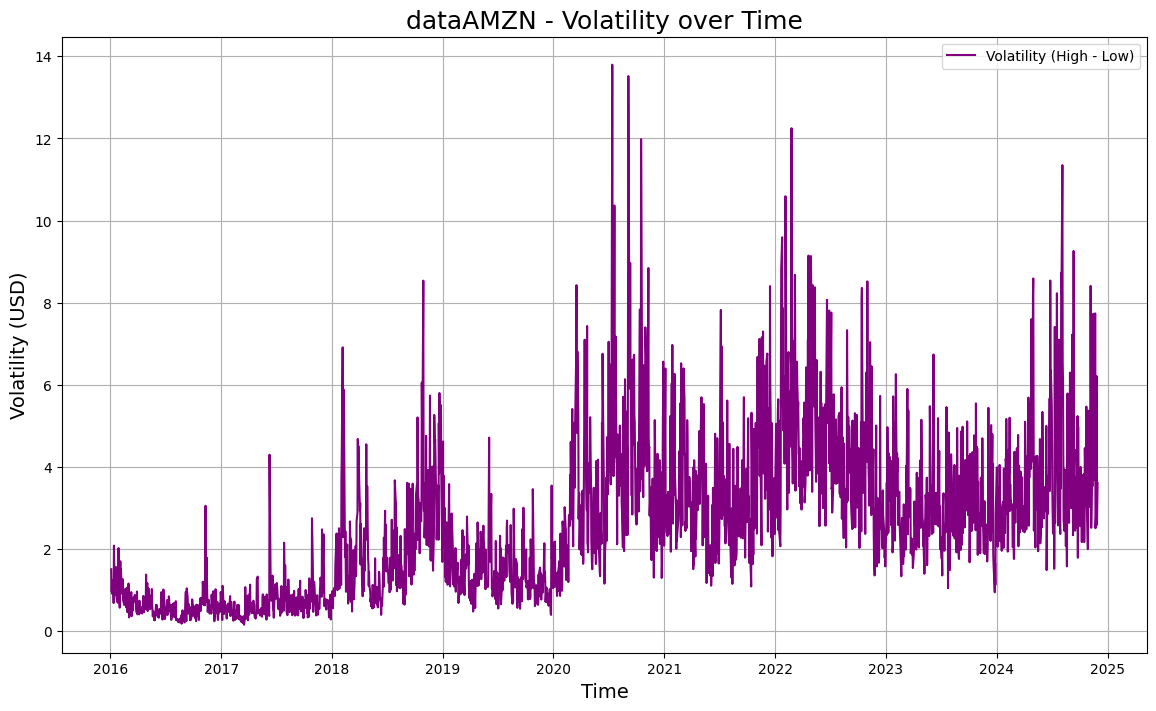


EDA for dataAAPL.csv:
              Open         High          Low        Close        Volume
count  2243.000000  2243.000000  2243.000000  2243.000000  2.243000e+03
mean    100.302984   101.377689    99.305408   100.394957  1.076006e+08
std      63.778482    64.429608    63.168678    63.836854  5.819446e+07
min      20.619369    21.001973    20.497946    20.697266  2.404830e+07
25%      40.685544    41.013055    40.384571    40.625650  6.909200e+07
50%      85.604708    86.423194    84.308718    85.682663  9.432680e+07
75%     156.051101   157.994061   152.989082   155.400330  1.297750e+08
max     235.947003   237.809998   234.192340   237.330002  5.334788e+08
<class 'pandas.core.frame.DataFrame'>
Index: 2243 entries, 2016-01-04 00:00:00-05:00 to 2024-11-29 00:00:00-05:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2243 non-null   float64
 1   High    2243 non-null   float64
 2   Low     2243 non-null   float6

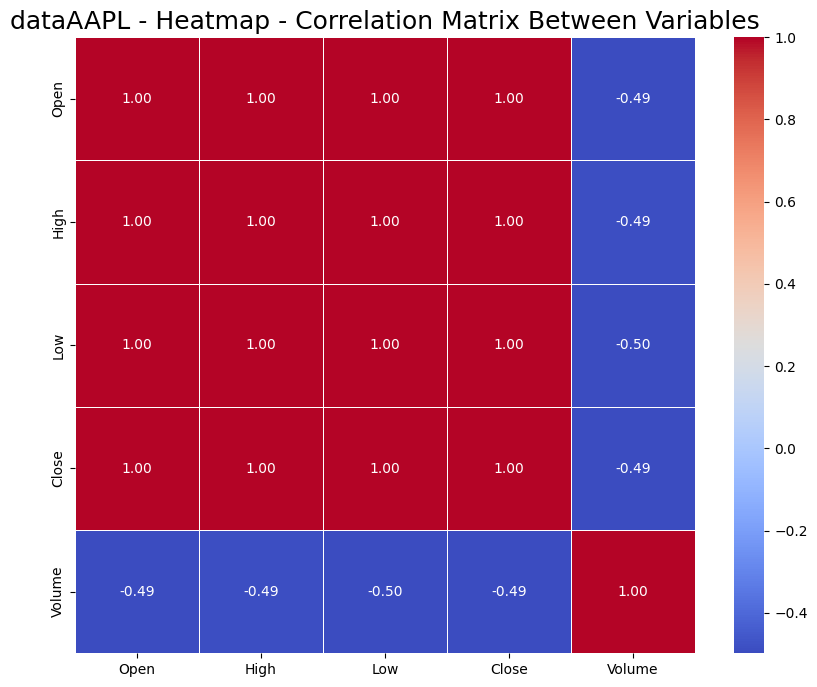

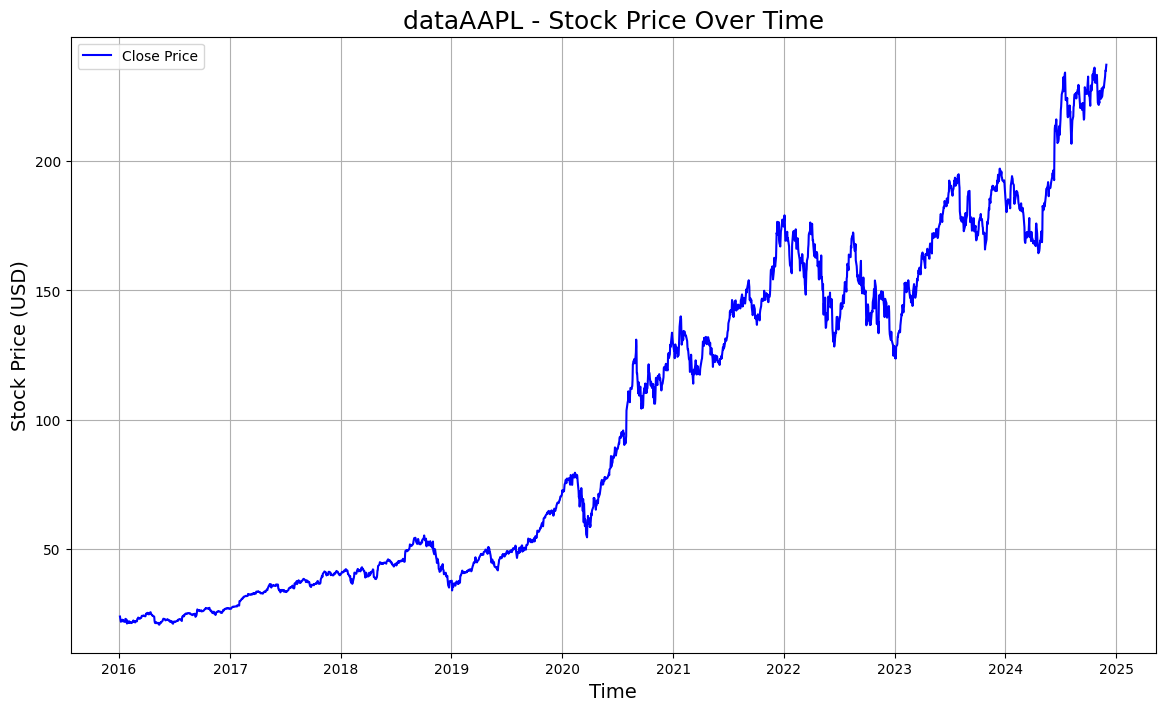

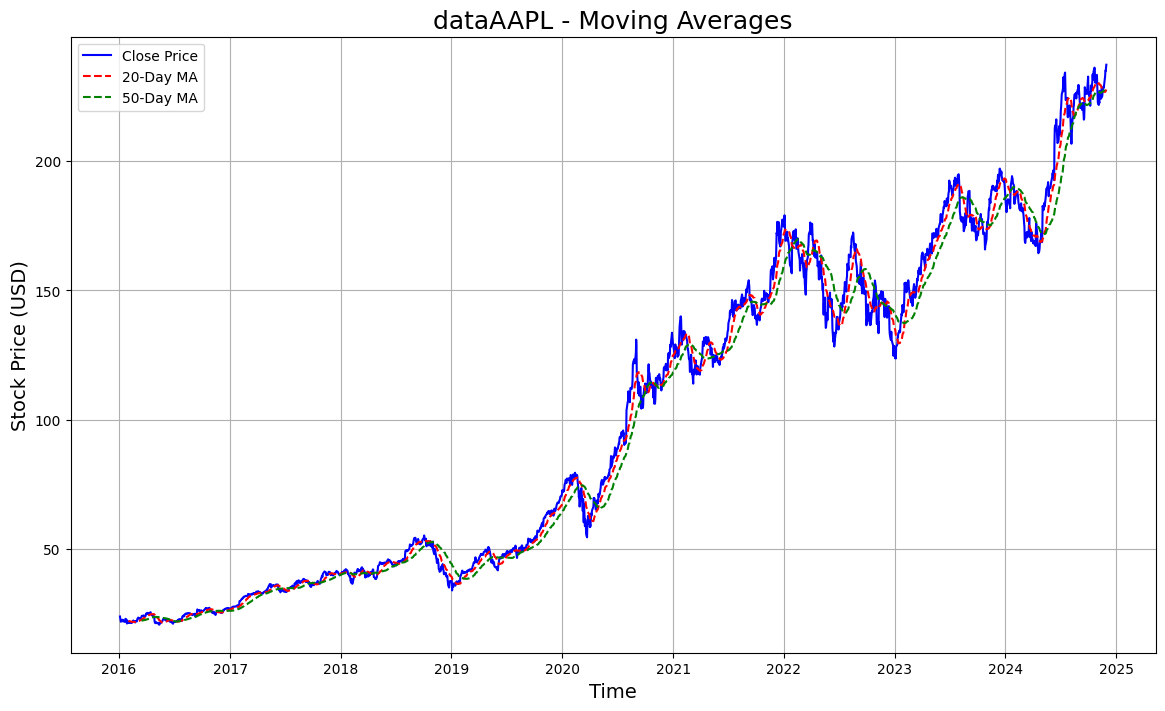

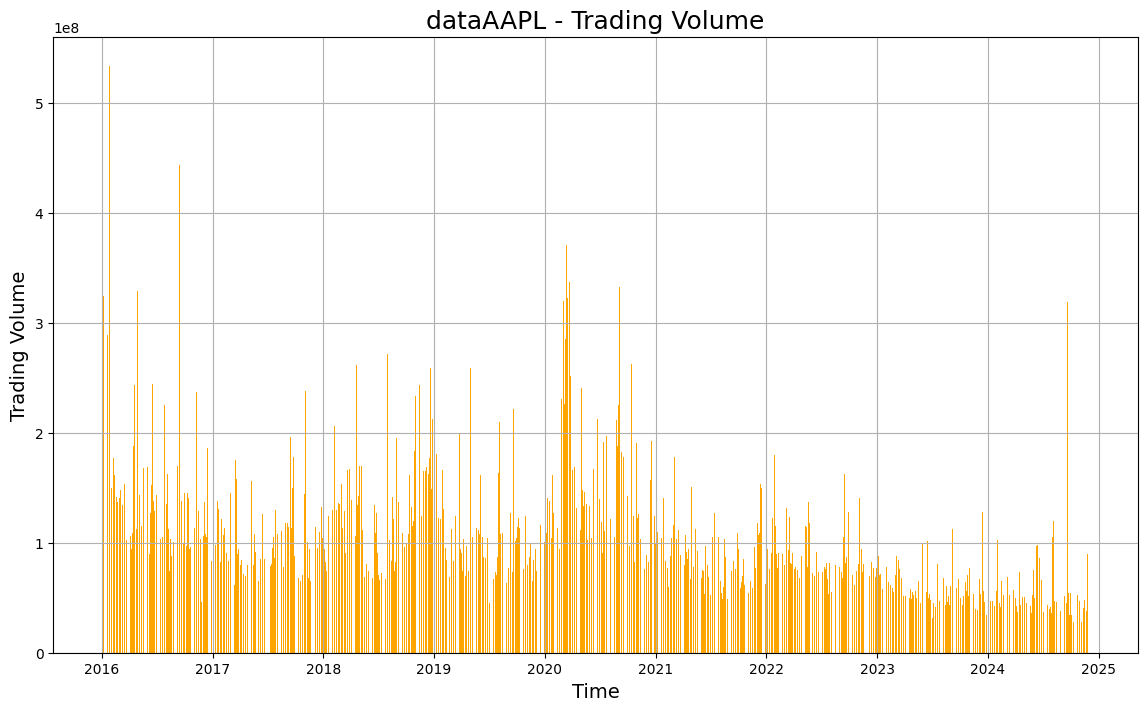

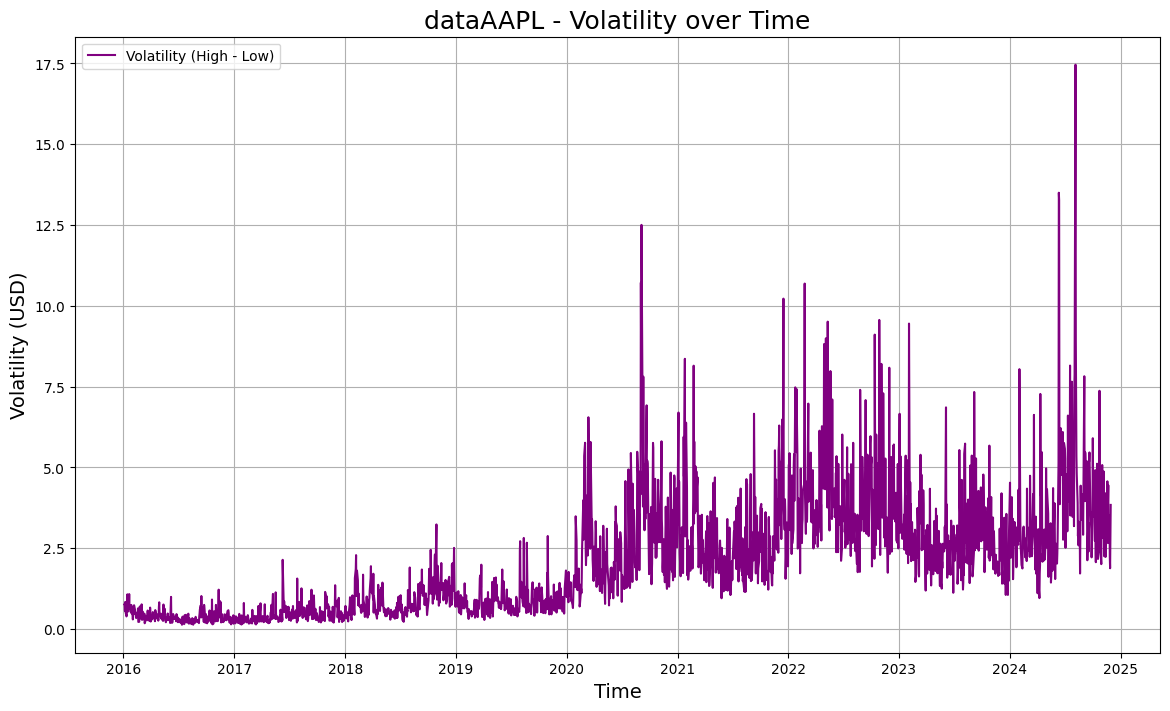


EDA for dataNVDA.csv:
              Open         High          Low        Close        Volume
count  2243.000000  2243.000000  2243.000000  2243.000000  2.243000e+03
mean     21.972207    22.372854    21.532163    21.971433  4.878863e+08
std      31.615251    32.176612    30.941004    31.579567  2.558644e+08
min       0.604613     0.623645     0.603881     0.615349  9.788400e+07
25%       4.162119     4.232283     4.104085     4.169605  3.251645e+08
50%       9.141101     9.253496     9.041910     9.171256  4.351280e+08
75%      22.500419    22.971449    22.090740    22.622918  5.816980e+08
max     149.339720   152.879470   146.249911   148.869751  3.692928e+09
<class 'pandas.core.frame.DataFrame'>
Index: 2243 entries, 2016-01-04 00:00:00-05:00 to 2024-11-29 00:00:00-05:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2243 non-null   float64
 1   High    2243 non-null   float64
 2   Low     2243 non-null   float6

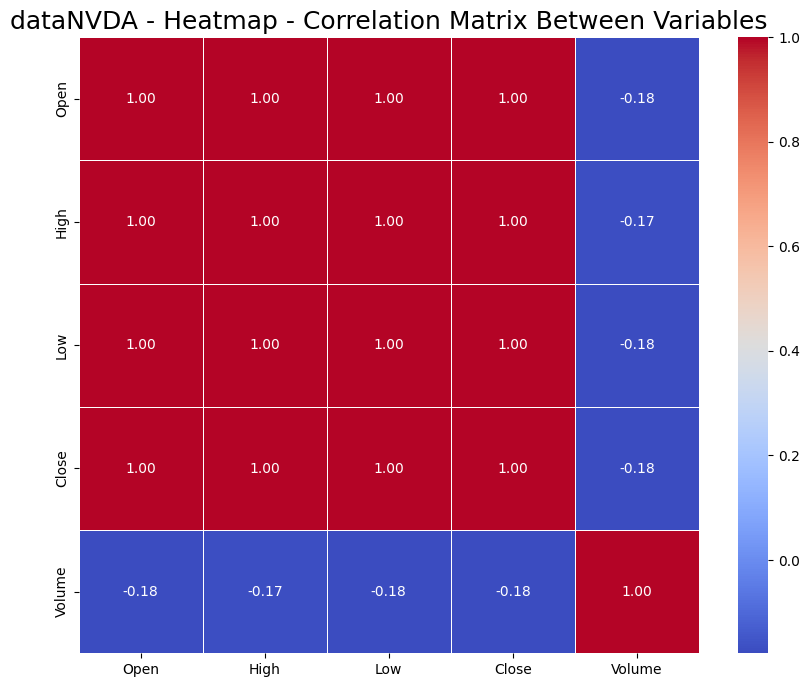

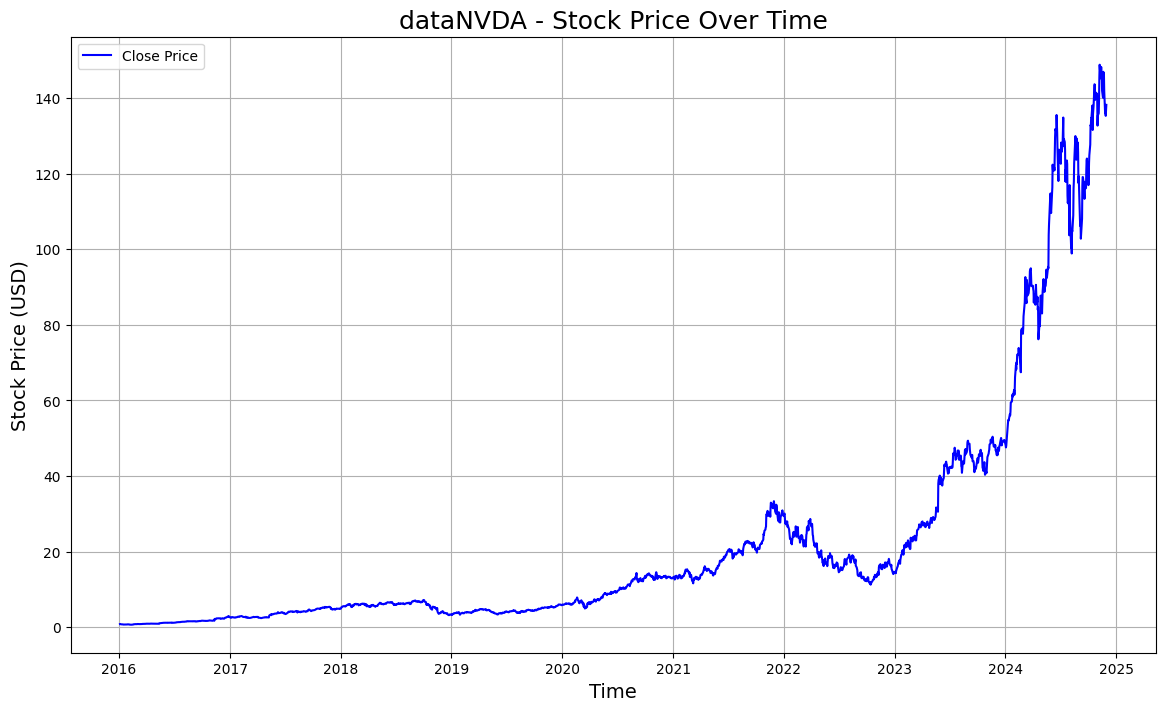

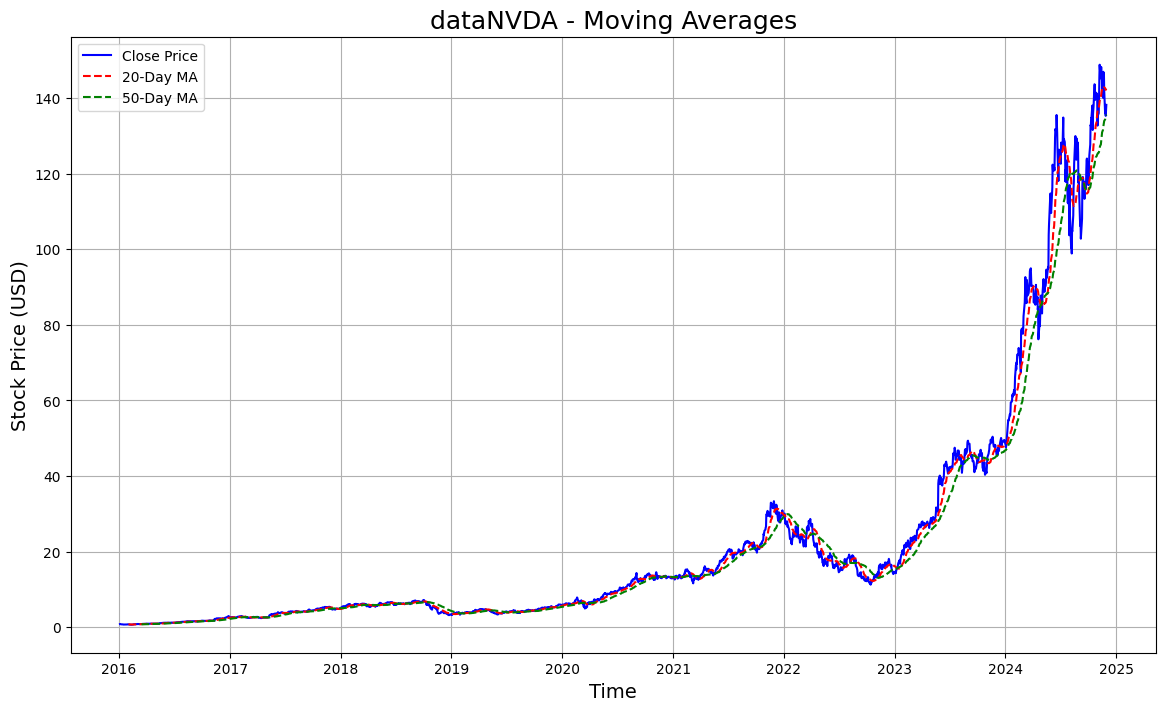

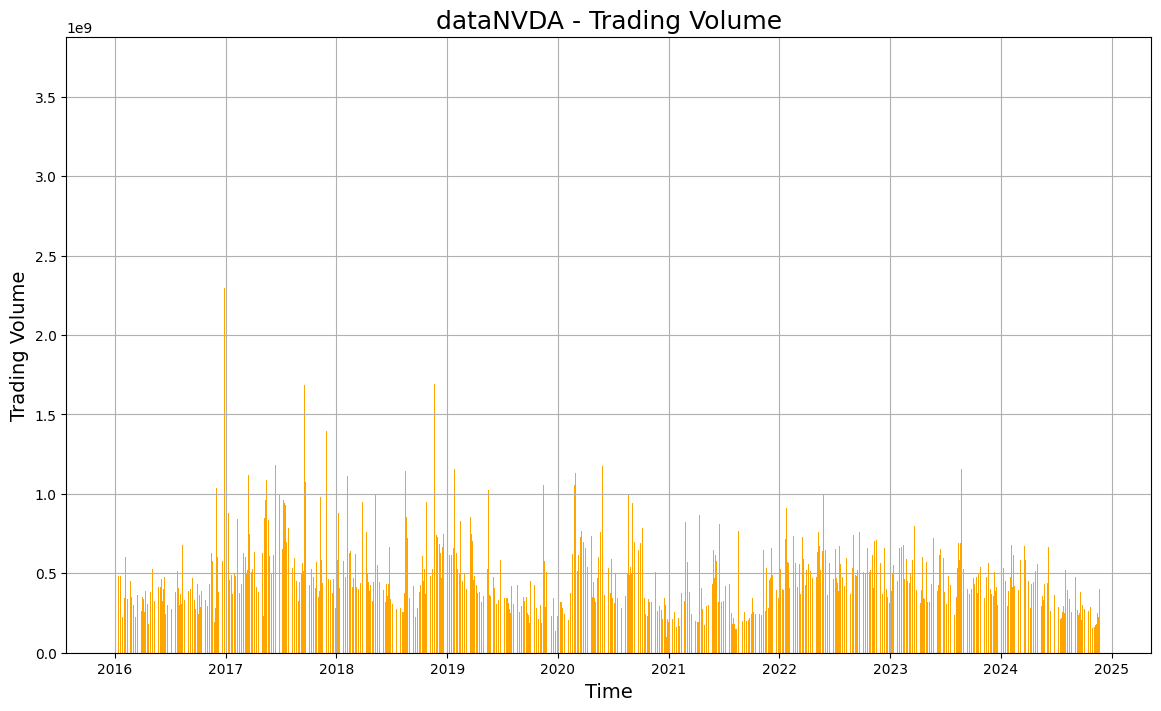

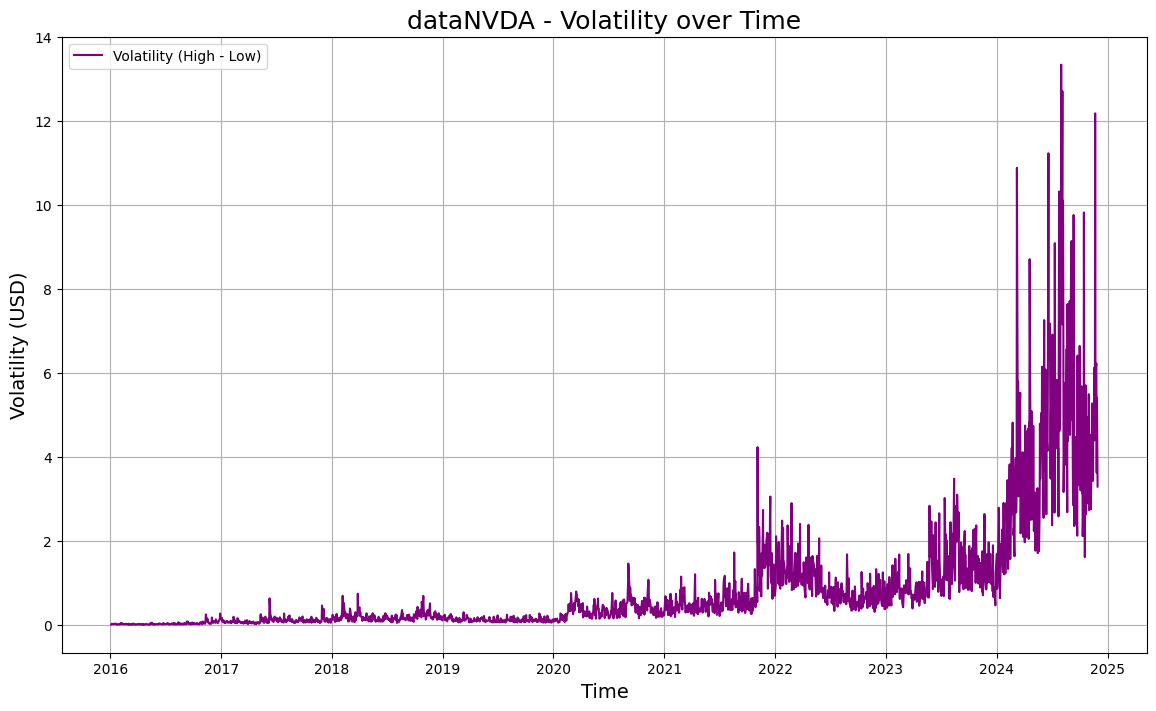


EDA for dataMSFT.csv:
              Open         High          Low        Close        Volume
count  2243.000000  2243.000000  2243.000000  2243.000000  2.243000e+03
mean    195.438396   197.291293   193.471655   195.475153  2.815920e+07
std     119.010810   120.023575   117.874080   119.001760  1.260784e+07
min      42.939170    43.724215    42.506957    43.326286  7.425600e+06
25%      87.072843    88.036279    86.053533    87.128784  2.015395e+07
50%     186.583203   188.978013   186.150434   187.689270  2.494650e+07
75%     283.186737   285.868135   280.324557   284.160965  3.233185e+07
max     465.228569   466.573450   462.698189   465.786438  1.335030e+08
<class 'pandas.core.frame.DataFrame'>
Index: 2243 entries, 2016-01-04 00:00:00-05:00 to 2024-11-29 00:00:00-05:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2243 non-null   float64
 1   High    2243 non-null   float64
 2   Low     2243 non-null   float6

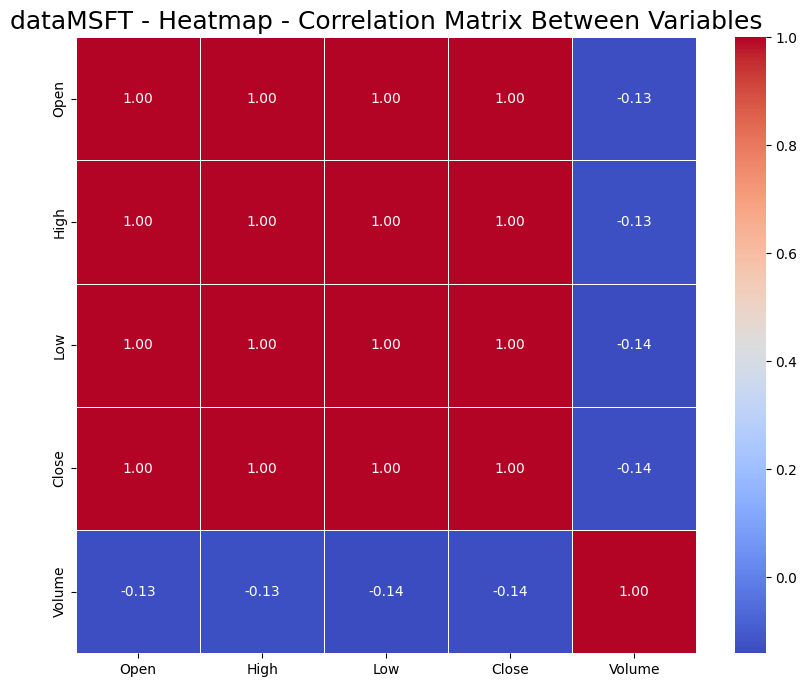

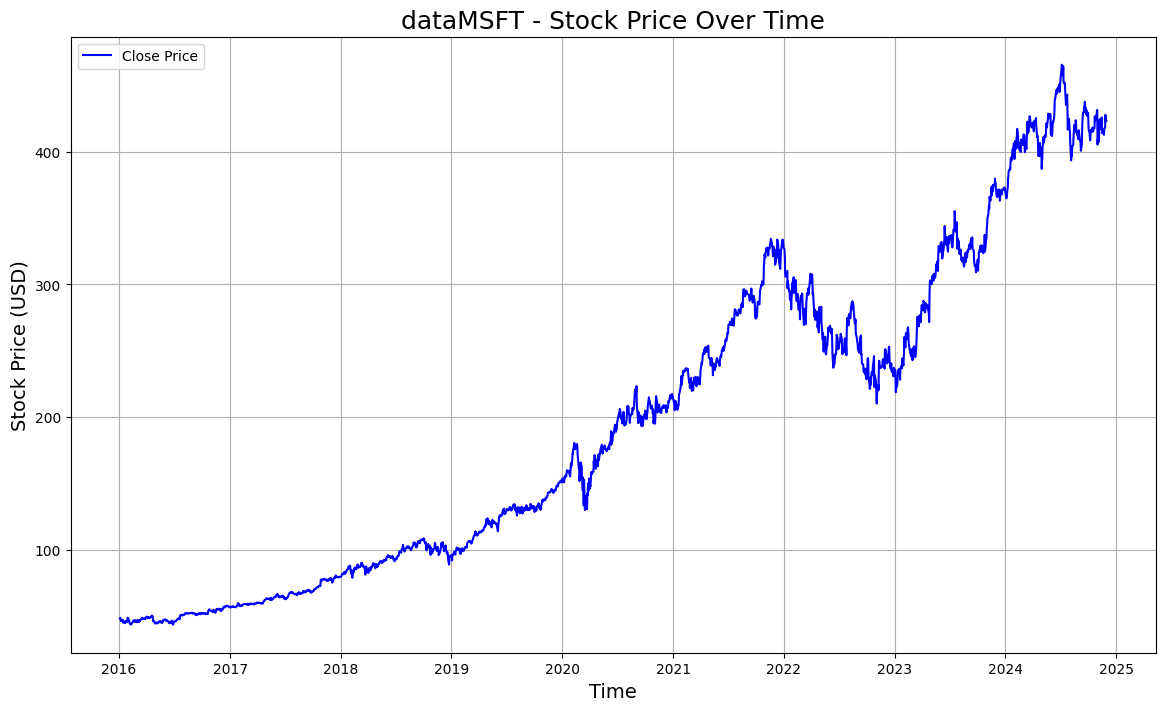

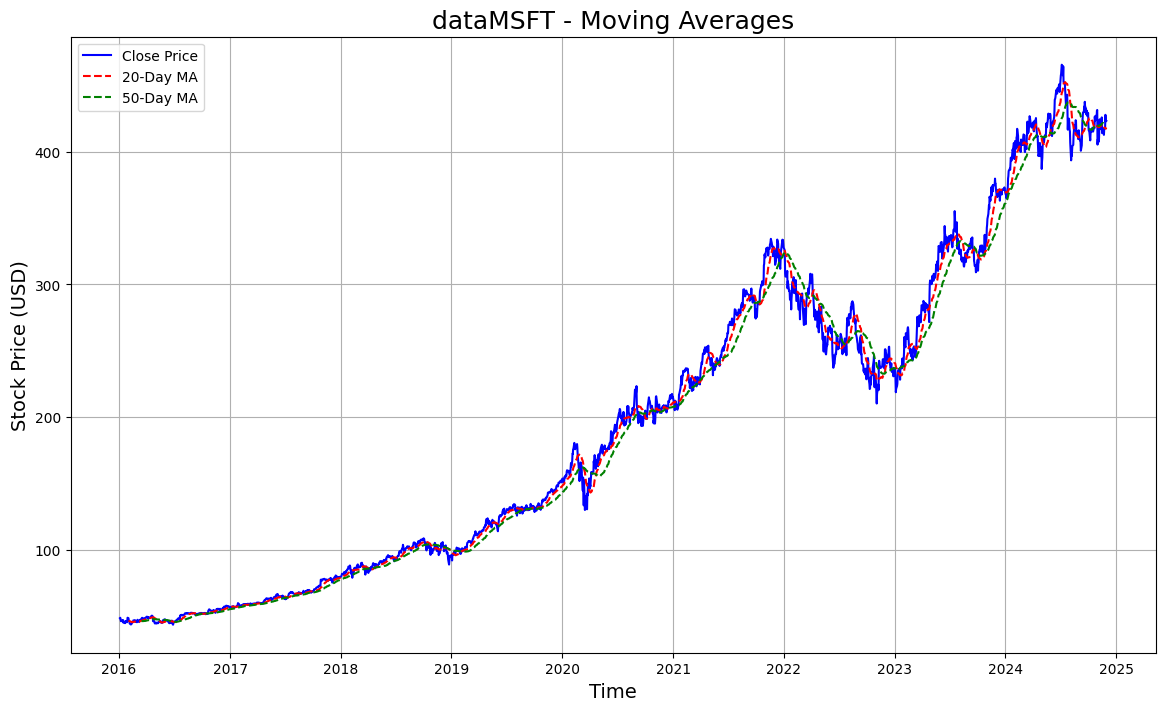

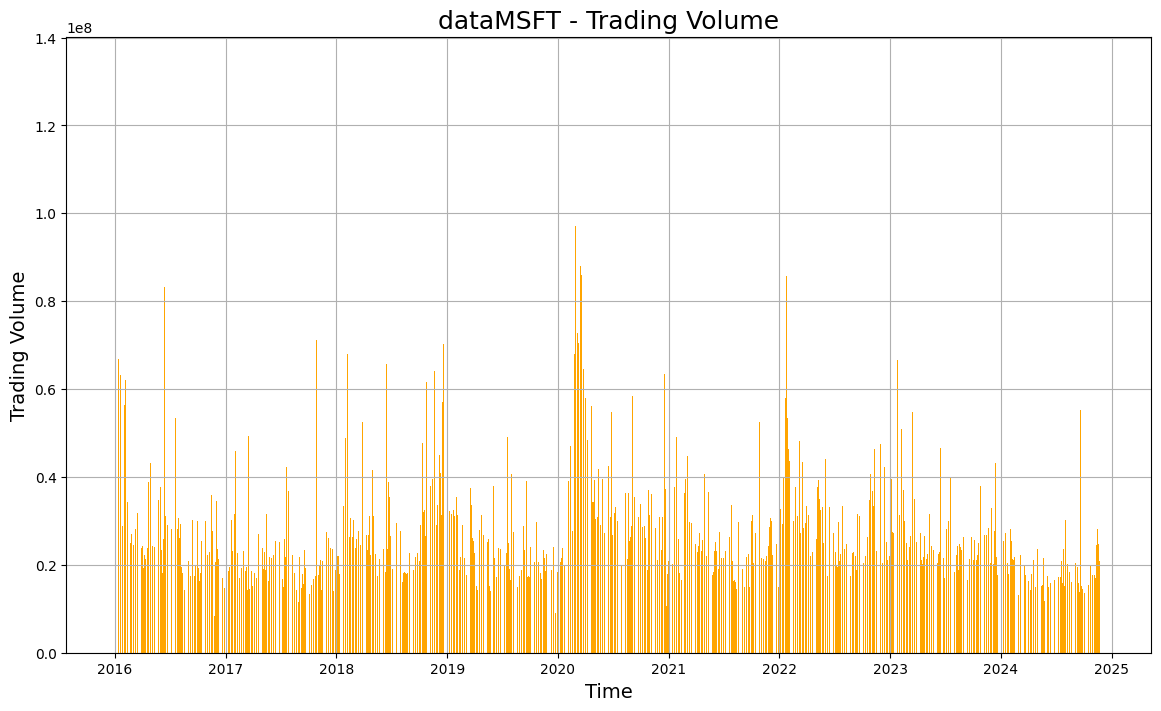

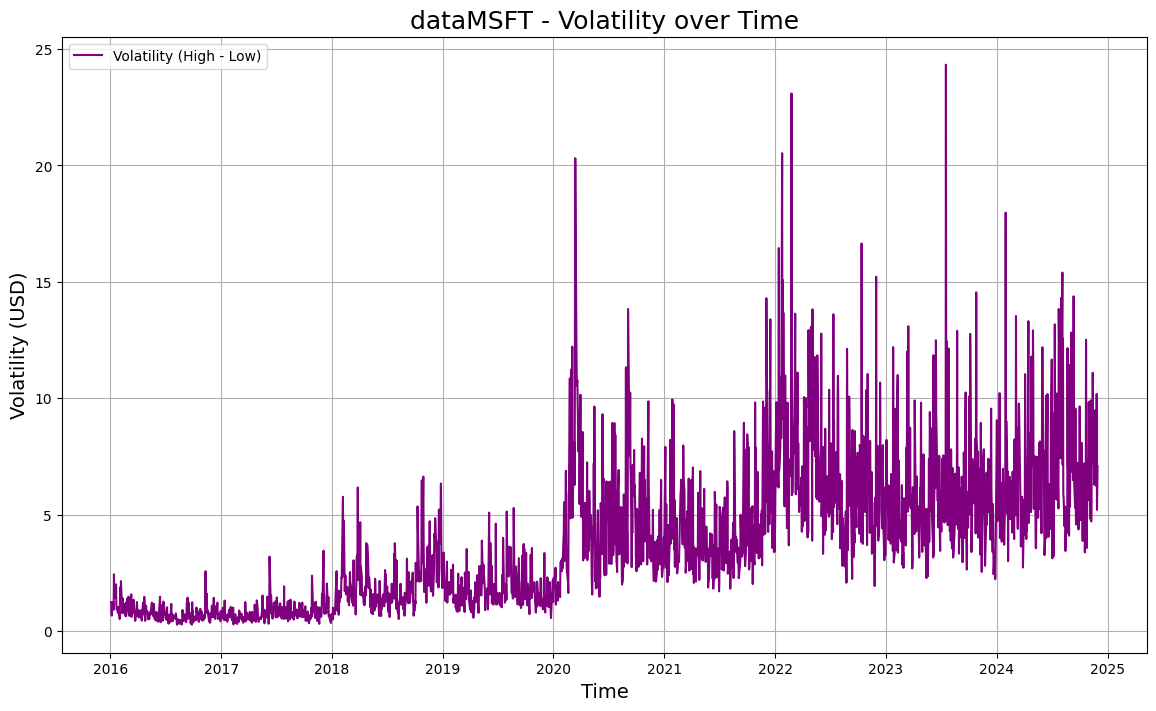


EDA for dataGOOG.csv:
              Open         High          Low        Close        Volume
count  2243.000000  2243.000000  2243.000000  2243.000000  2.243000e+03
mean     87.375455    88.312843    86.512443    87.426844  2.967135e+07
std      42.107037    42.562034    41.677641    42.109757  1.408963e+07
min      33.272952    33.494653    33.034307    33.293373  6.936000e+06
25%      52.503599    53.067797    51.868208    52.489399  2.082665e+07
50%      72.839777    73.568817    72.078018    72.958351  2.626200e+07
75%     124.721855   126.017950   123.805129   124.924129  3.400600e+07
max     191.280899   192.837094   190.153672   192.188690  1.269620e+08
<class 'pandas.core.frame.DataFrame'>
Index: 2243 entries, 2016-01-04 00:00:00-05:00 to 2024-11-29 00:00:00-05:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2243 non-null   float64
 1   High    2243 non-null   float64
 2   Low     2243 non-null   float6

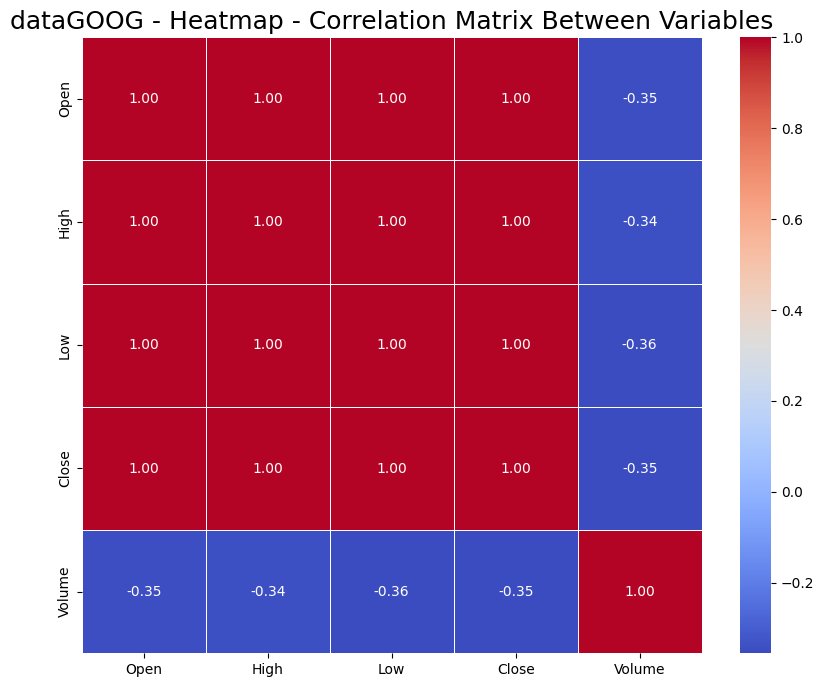

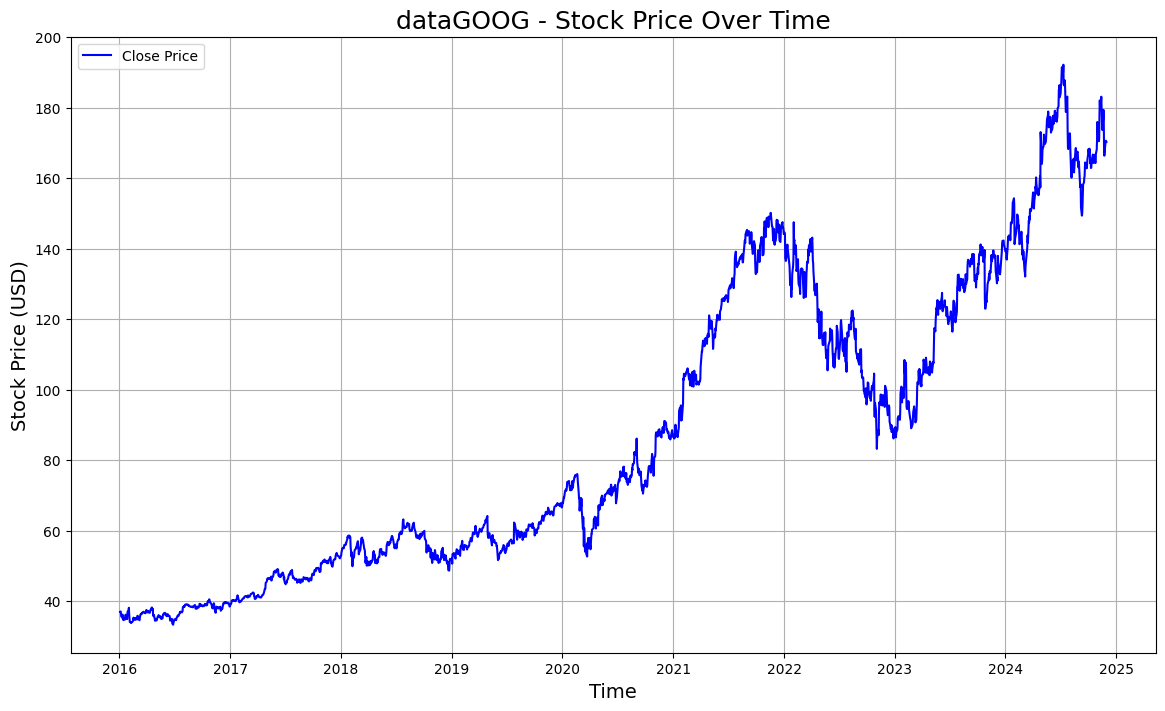

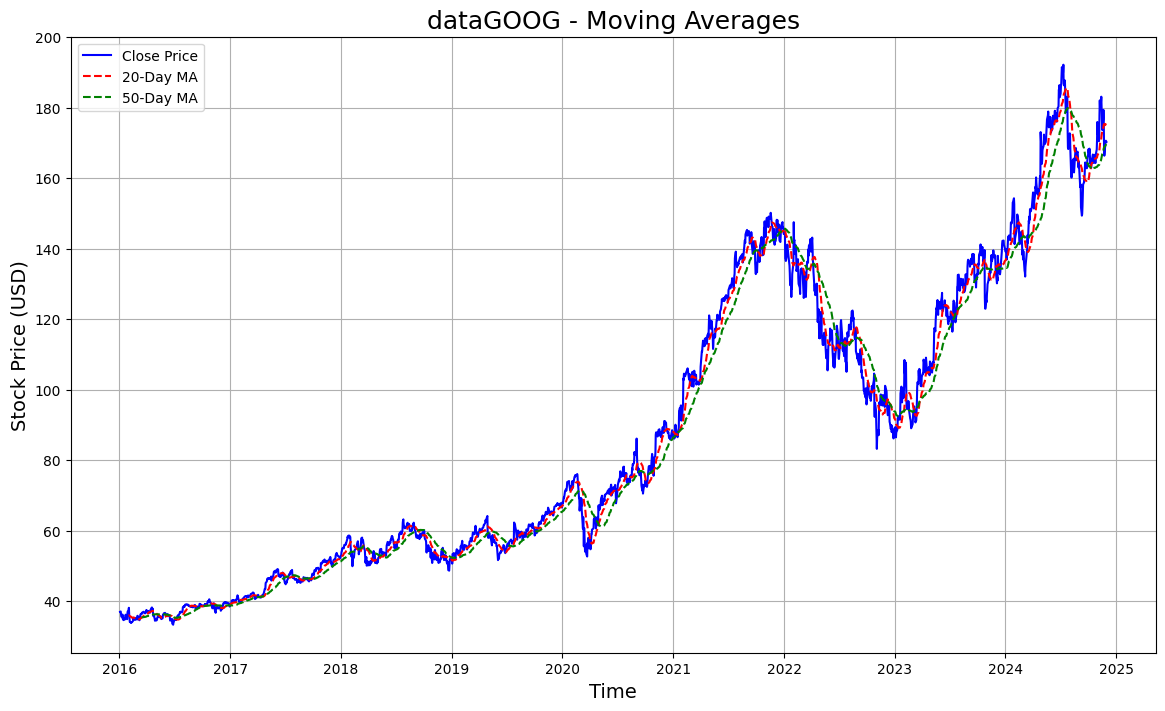

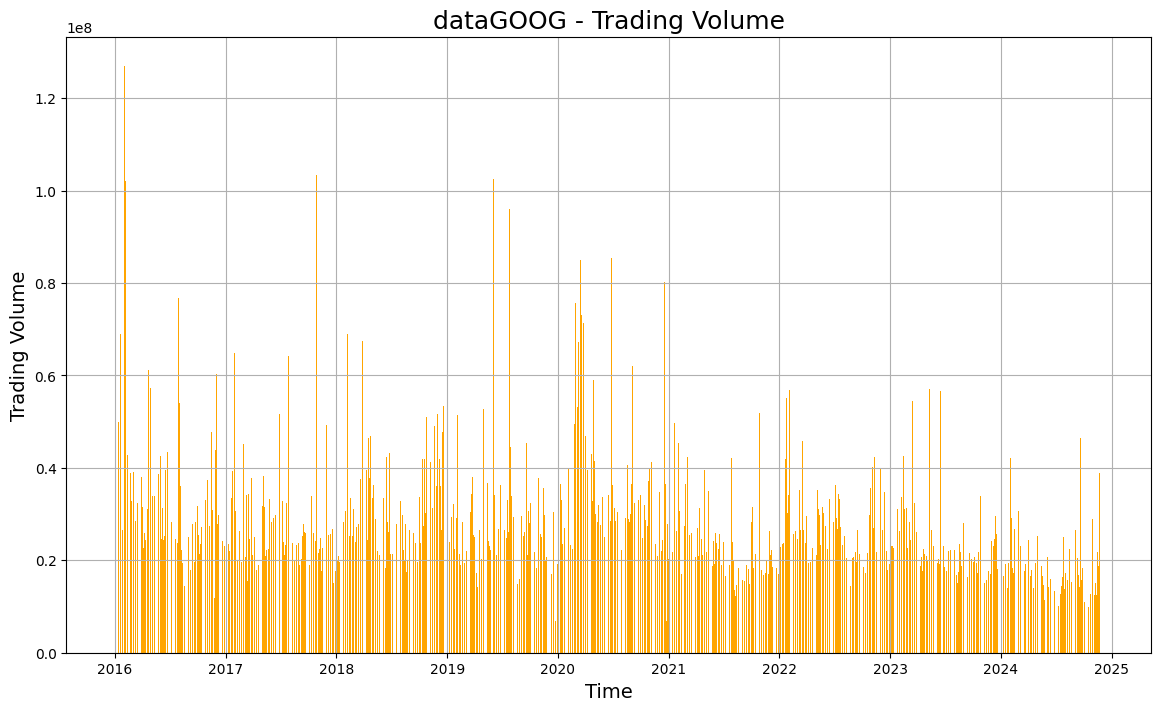

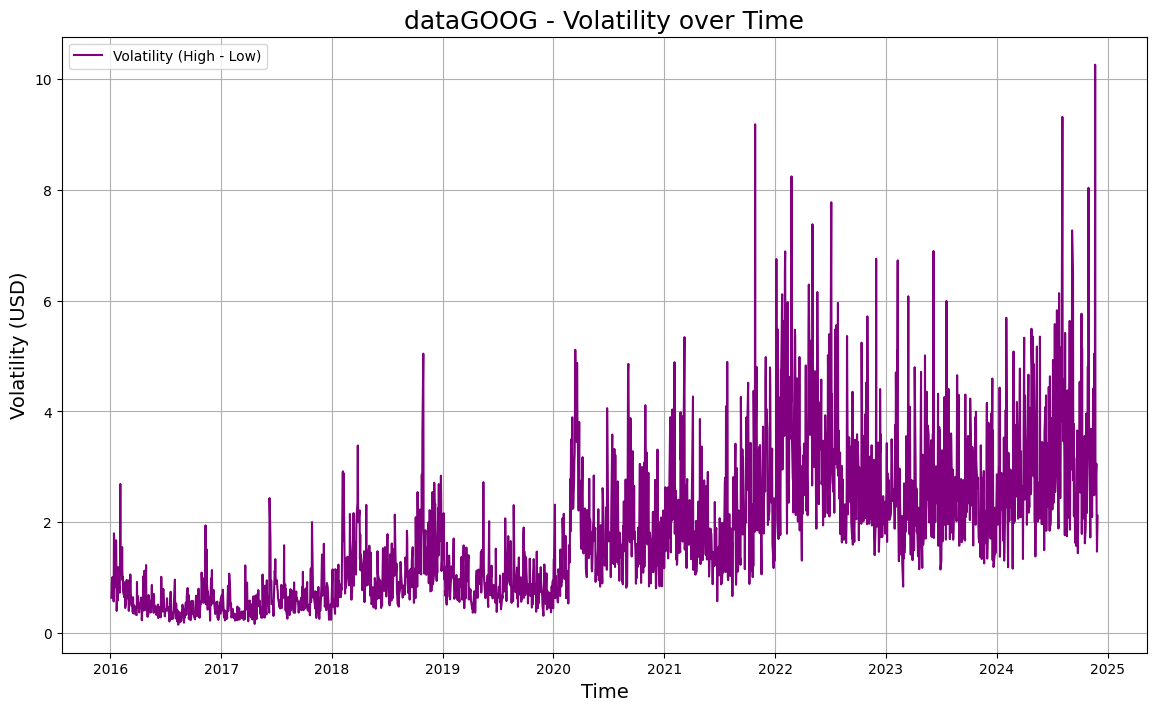


EDA for dataMETA.csv:
              Open         High          Low        Close        Volume
count  2243.000000  2243.000000  2243.000000  2243.000000  2.243000e+03
mean    232.902620   235.888498   230.001941   233.015244  2.251869e+07
std     114.234918   115.565521   112.788273   114.205550  1.514261e+07
min      89.809591    90.188447    87.825564    88.643105  5.467500e+06
25%     155.471905   158.024199   152.451001   154.280479  1.403365e+07
50%     189.429642   192.041775   186.667957   188.981018  1.873440e+07
75%     293.969874   297.314832   287.938058   293.366714  2.567450e+07
max     600.979980   602.950012   589.960022   595.940002  2.323166e+08
<class 'pandas.core.frame.DataFrame'>
Index: 2243 entries, 2016-01-04 00:00:00-05:00 to 2024-11-29 00:00:00-05:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2243 non-null   float64
 1   High    2243 non-null   float64
 2   Low     2243 non-null   float6

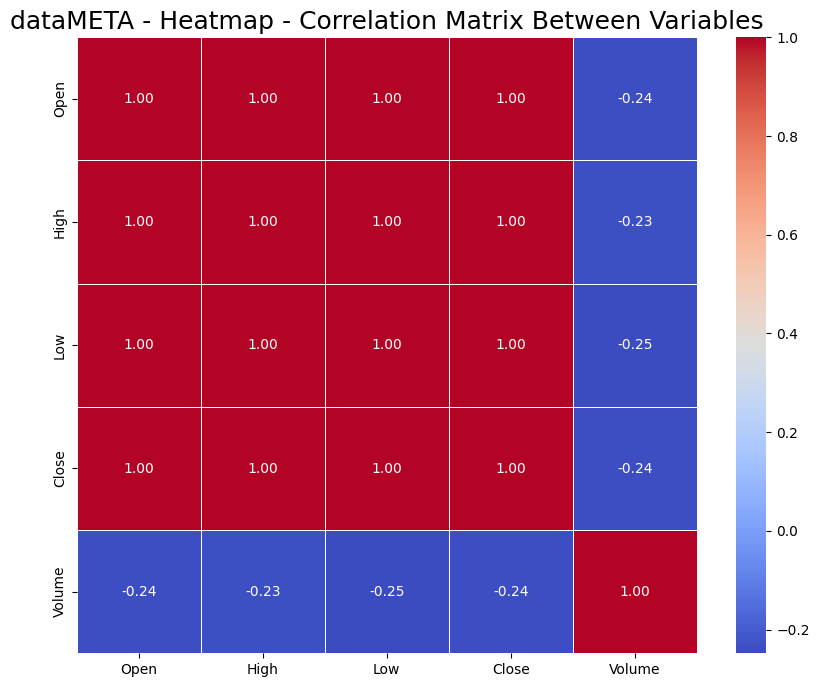

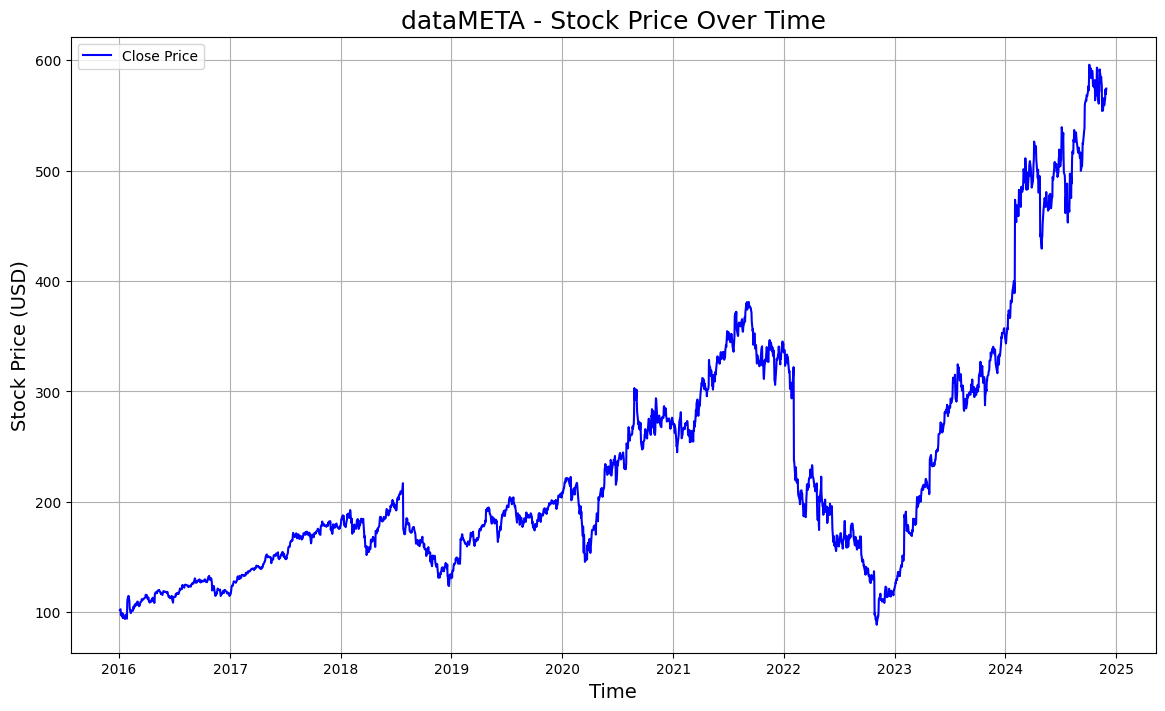

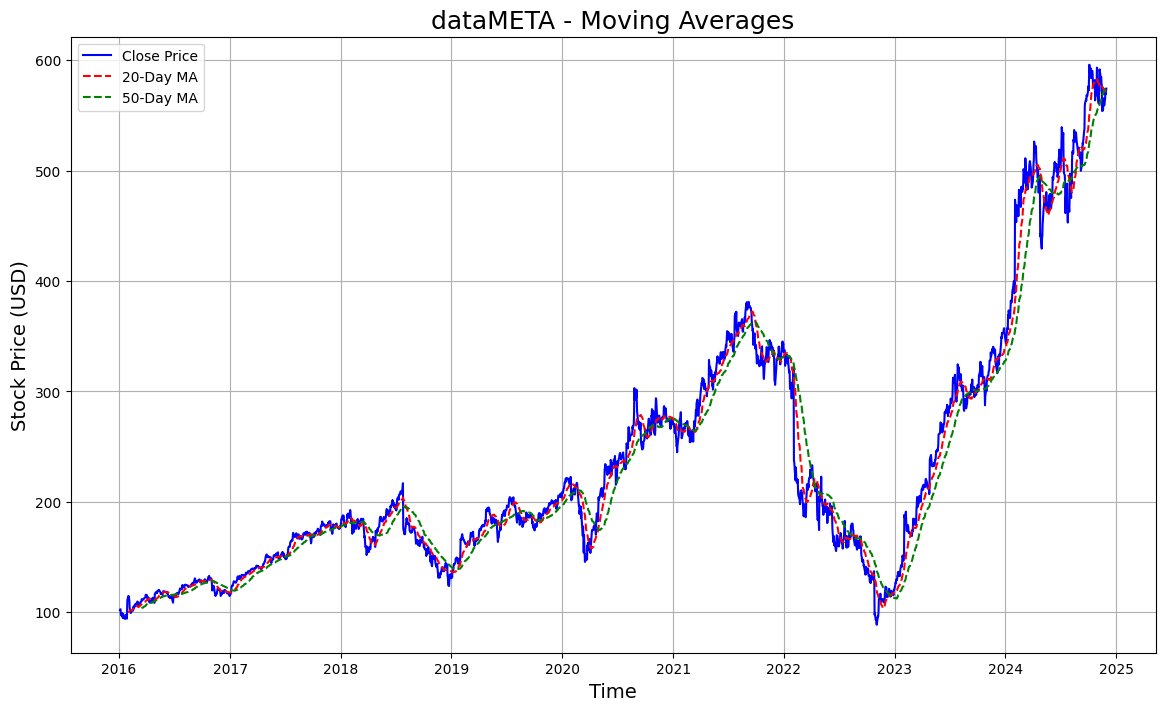

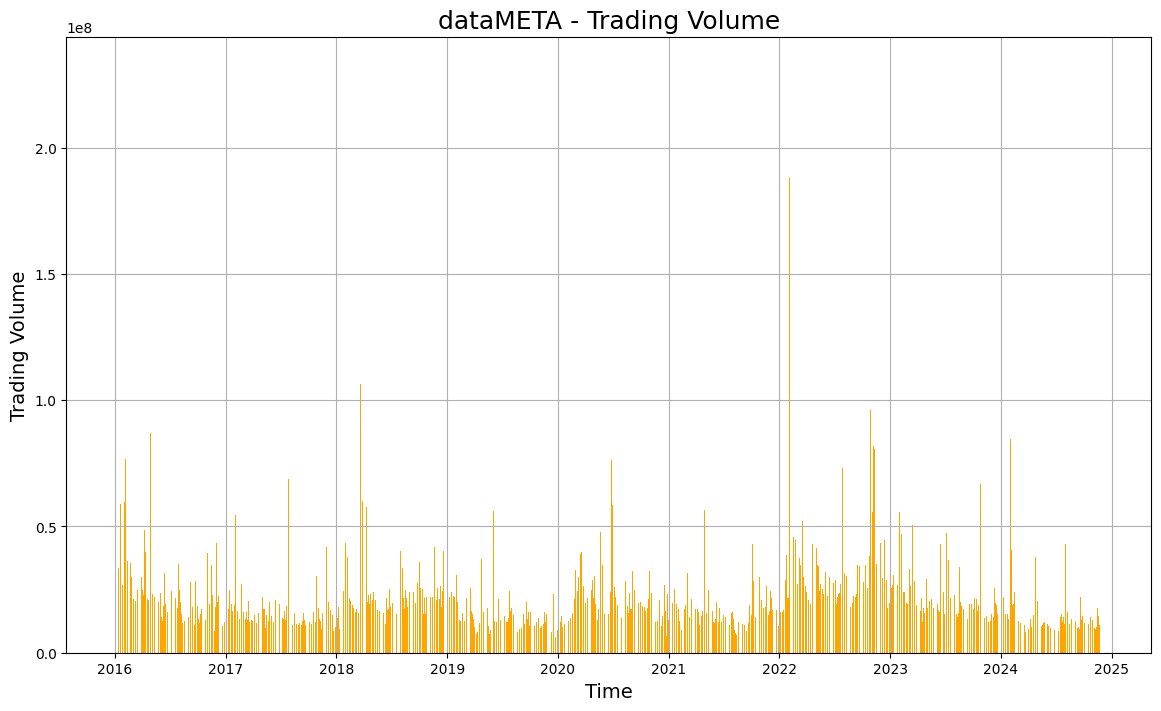

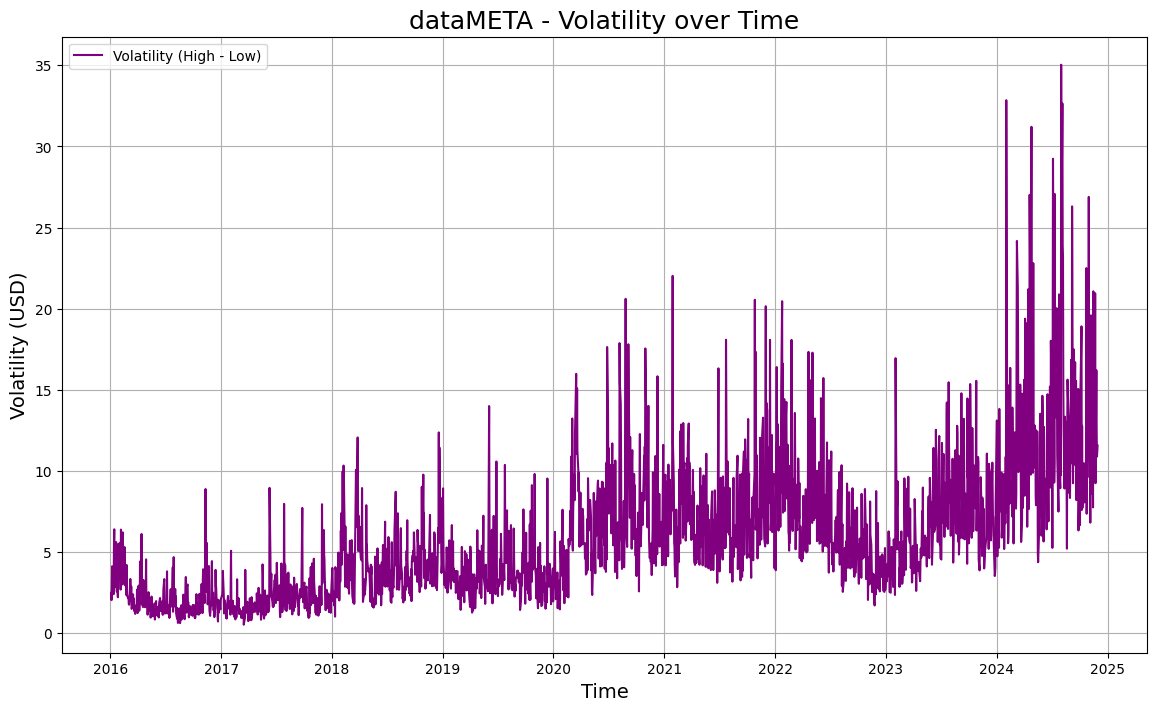


EDA for dataTSLA.csv:
              Open         High          Low        Close        Volume
count  2243.000000  2243.000000  2243.000000  2243.000000  2.243000e+03
mean    124.172397   126.904211   121.260772   124.141560  1.178531e+08
std     112.243610   114.731039   109.512495   112.143937  7.570816e+07
min       9.488000    10.331333     9.403333     9.578000  2.489250e+07
25%      19.882999    20.290333    19.516334    19.907333  7.095480e+07
50%      66.013336    67.000000    63.658001    65.732002  9.762450e+07
75%     225.936668   231.014999   220.650002   225.670006  1.358681e+08
max     411.470001   414.496674   405.666656   409.970001  9.140820e+08
<class 'pandas.core.frame.DataFrame'>
Index: 2243 entries, 2016-01-04 00:00:00-05:00 to 2024-11-29 00:00:00-05:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2243 non-null   float64
 1   High    2243 non-null   float64
 2   Low     2243 non-null   float6

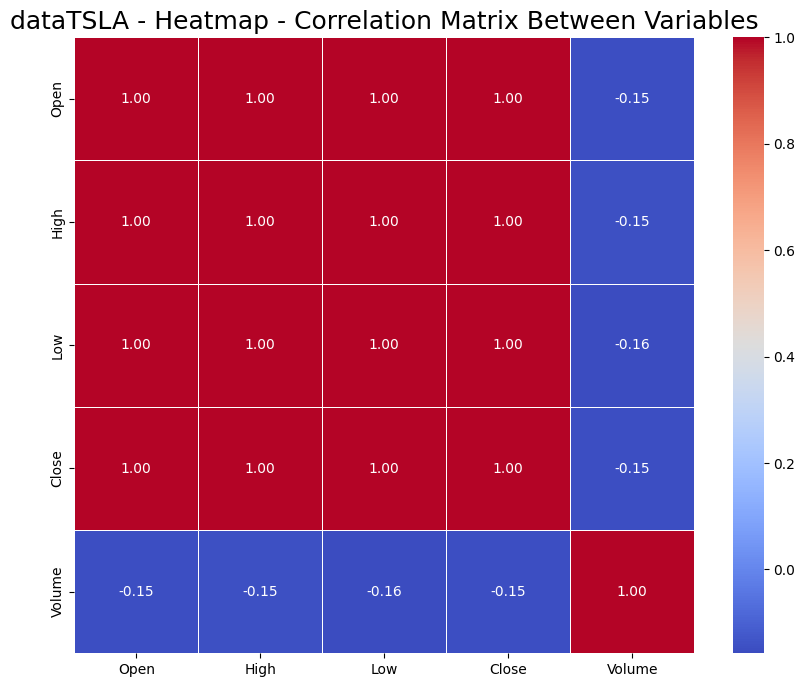

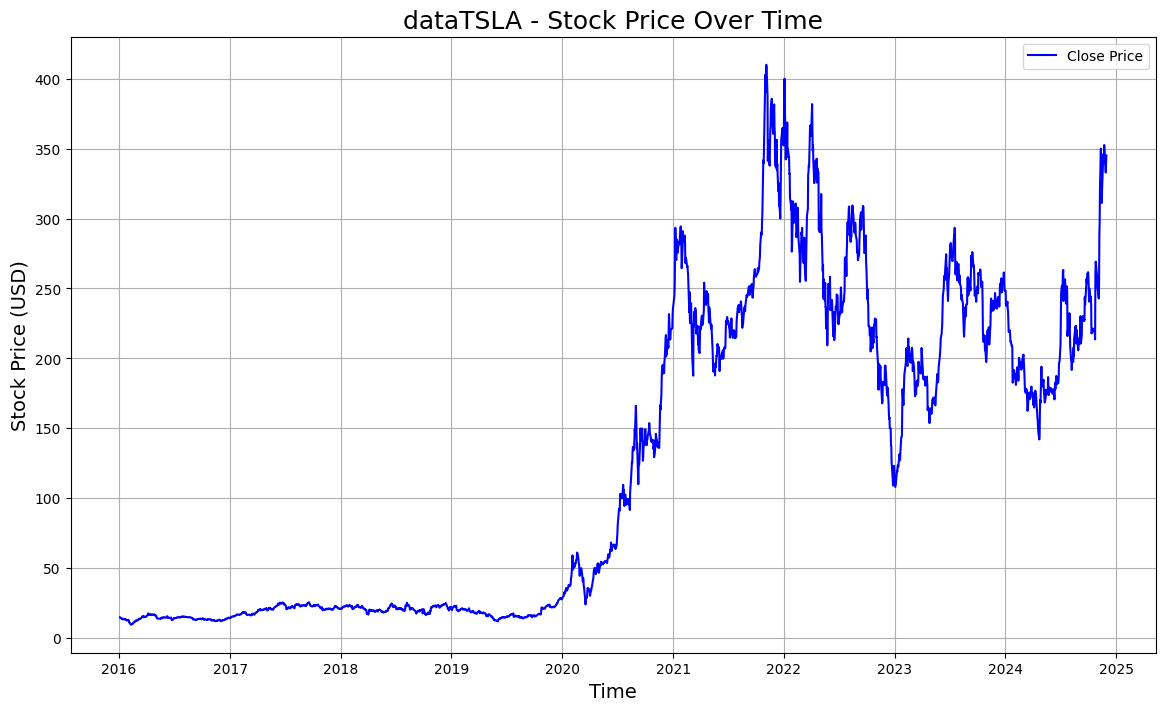

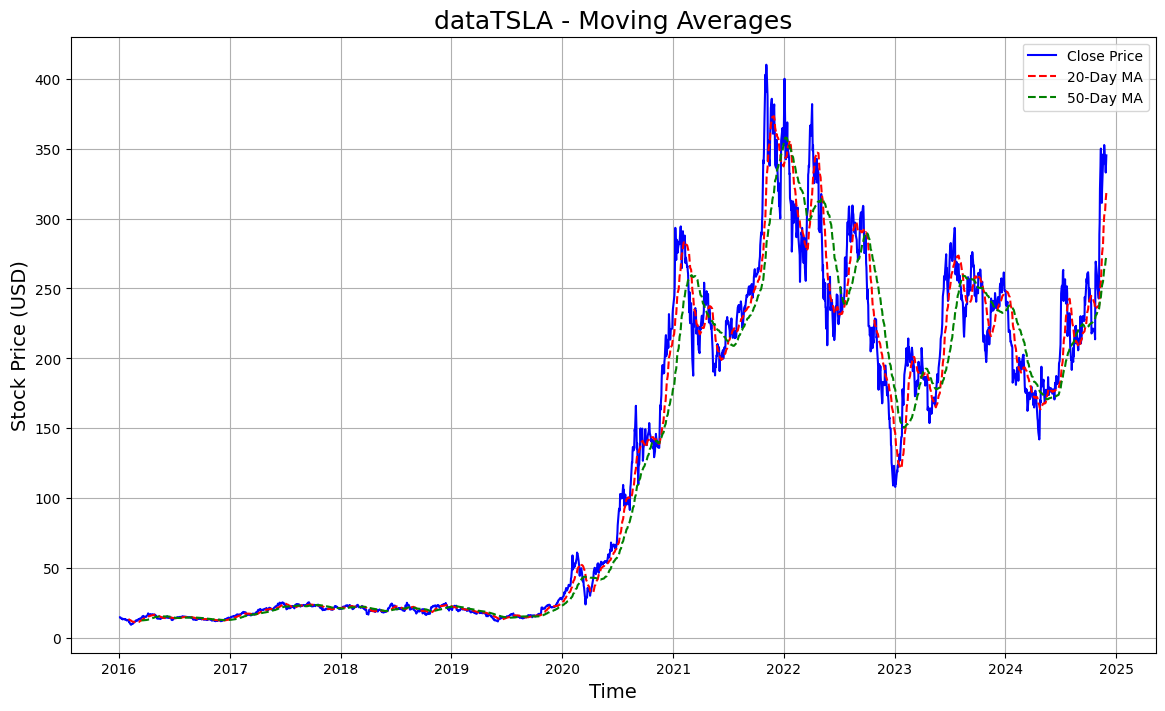

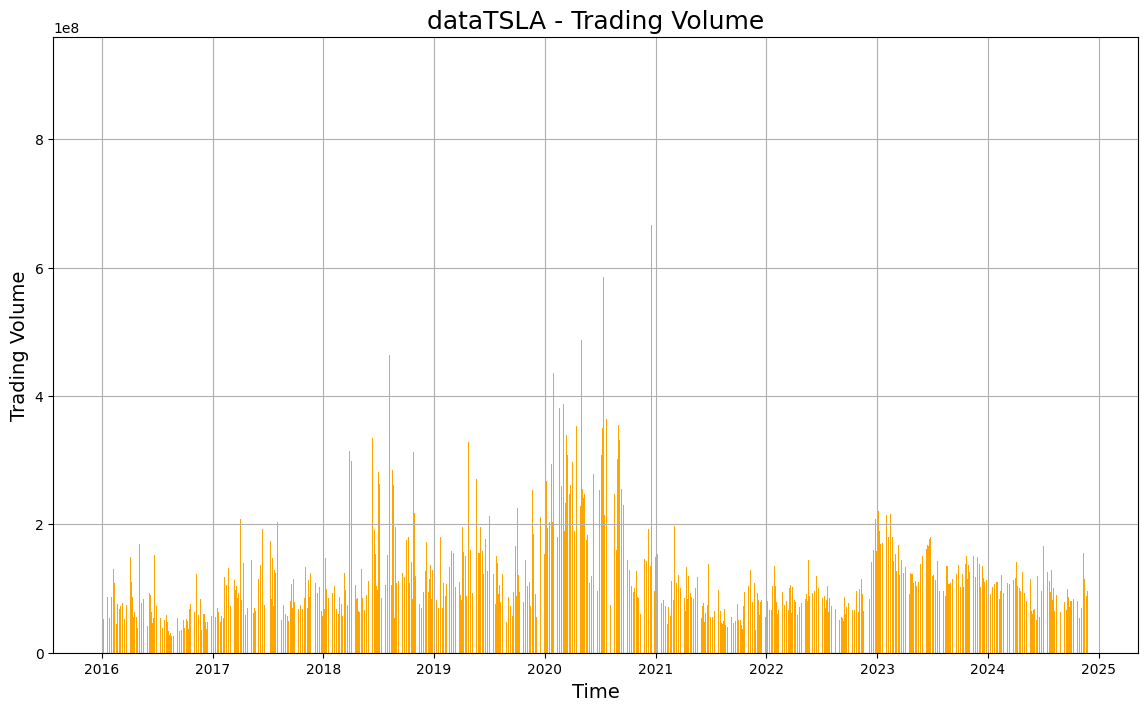

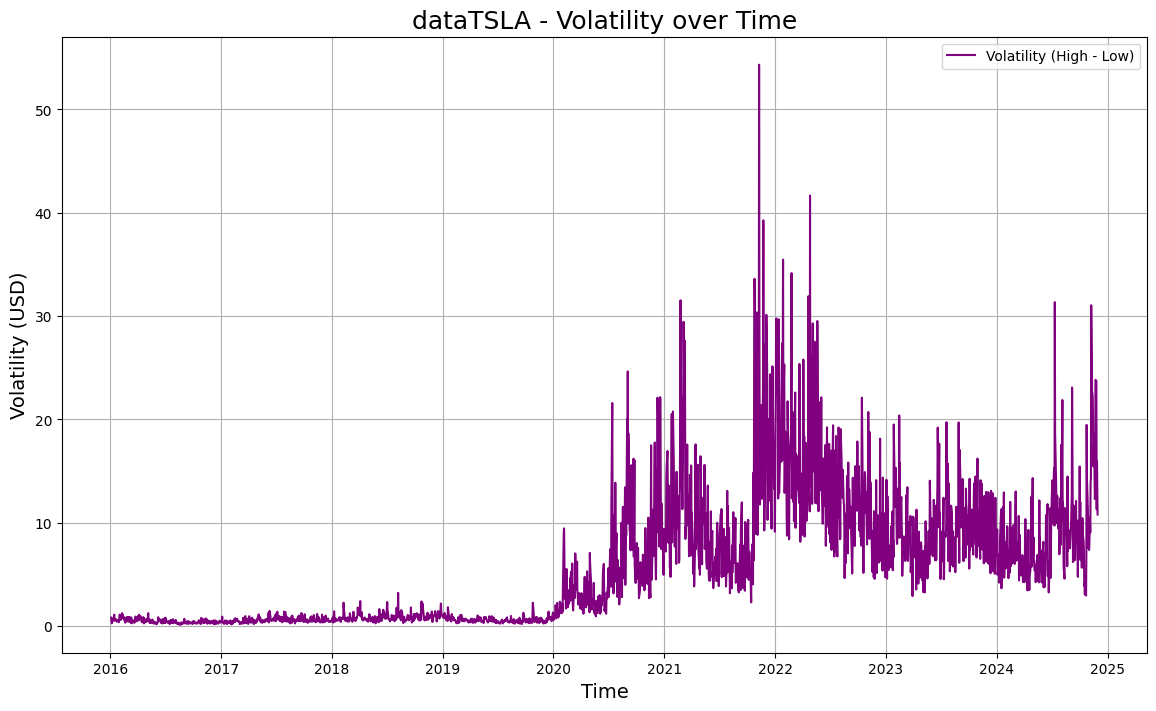


EDA for dataWMT.csv:
              Open         High          Low        Close        Volume
count  2243.000000  2243.000000  2243.000000  2243.000000  2.243000e+03
mean     38.759452    39.072366    38.467002    38.775961  2.375940e+07
std      14.546659    14.645060    14.441824    14.553873  1.348768e+07
min      16.969083    17.246759    16.884944    17.064451  6.287500e+06
25%      26.276824    26.598004    26.142671    26.372438  1.608915e+07
50%      38.677153    39.280944    38.377636    38.789463  2.027940e+07
75%      46.598116    46.898947    46.155987    46.604355  2.712435e+07
max      92.056042    92.435199    91.617012    92.295509  1.686990e+08
<class 'pandas.core.frame.DataFrame'>
Index: 2243 entries, 2016-01-04 00:00:00-05:00 to 2024-11-29 00:00:00-05:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2243 non-null   float64
 1   High    2243 non-null   float64
 2   Low     2243 non-null   float64

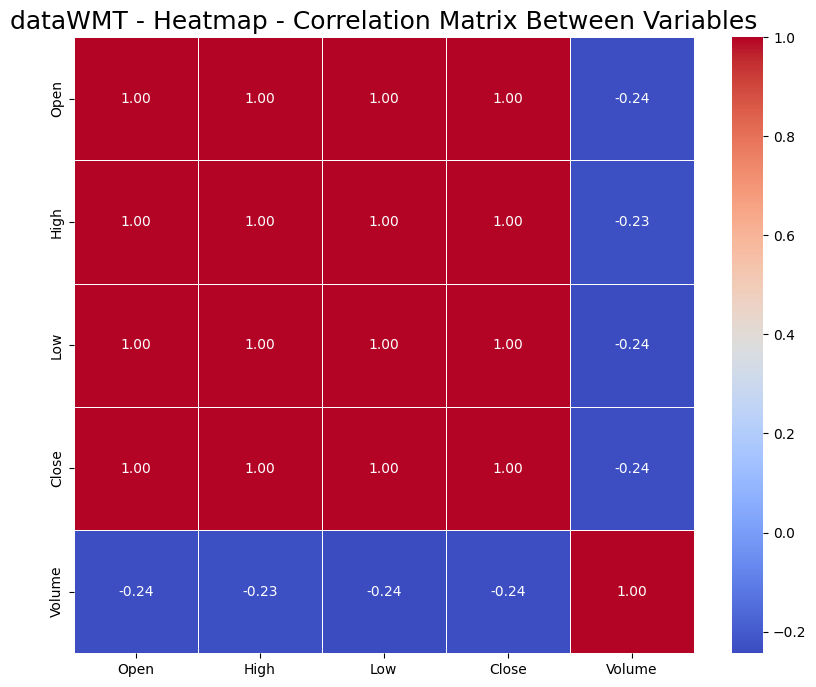

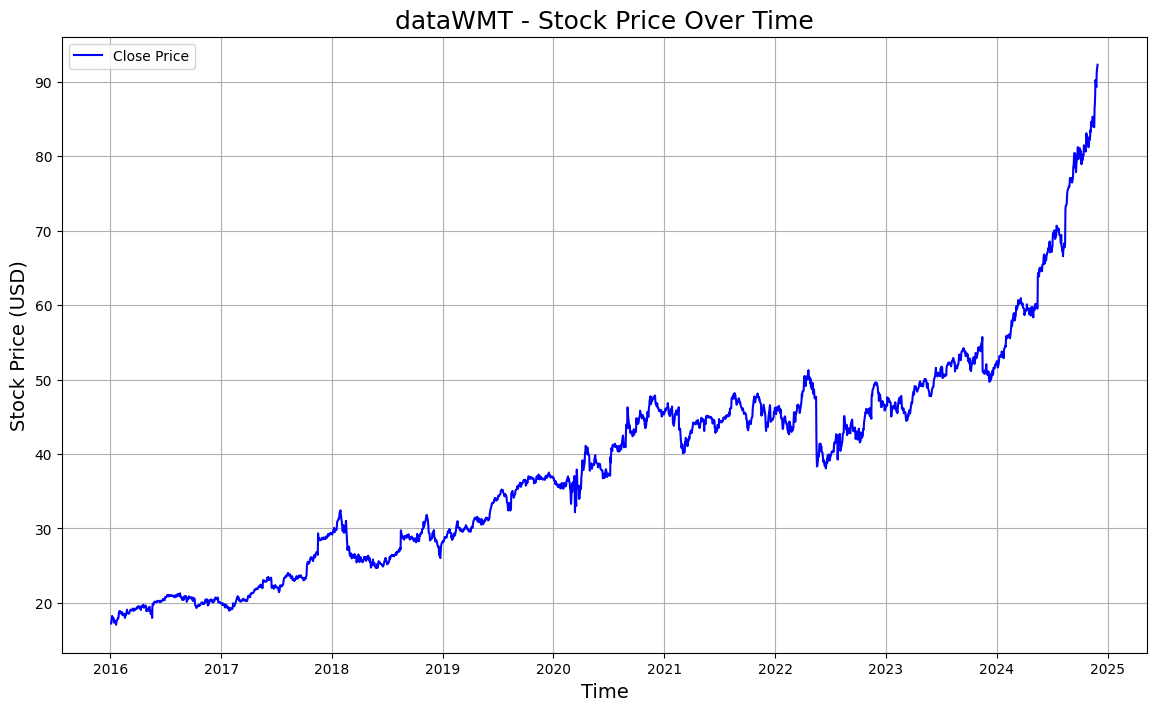

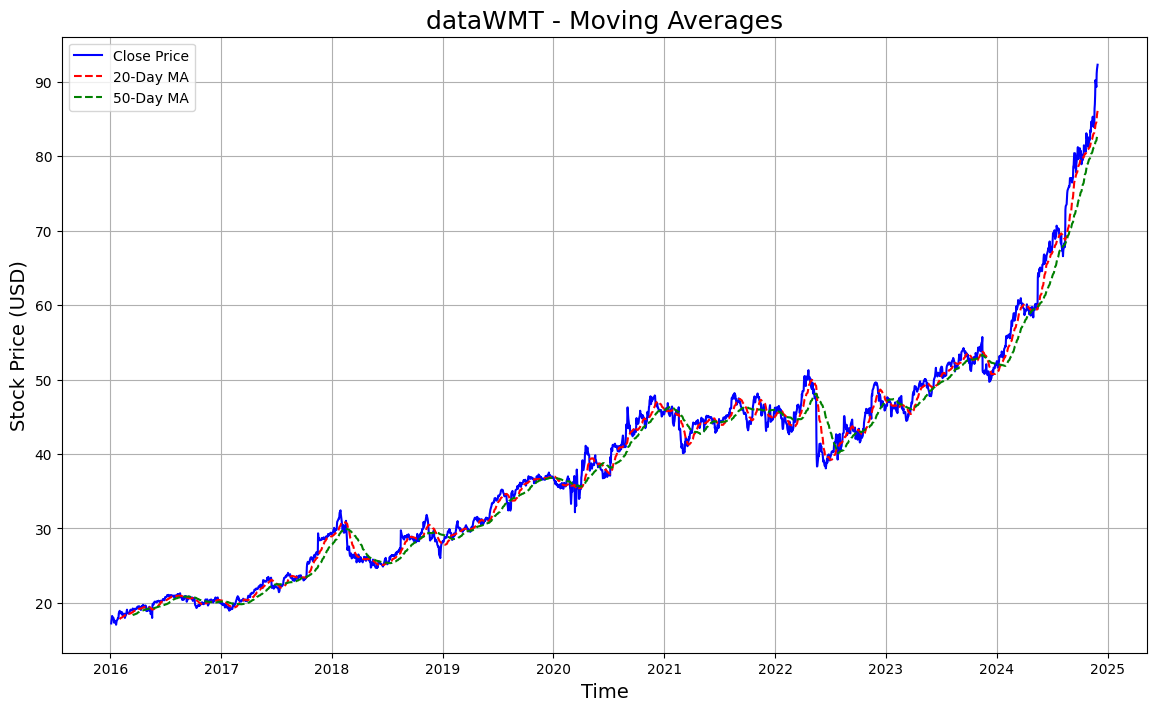

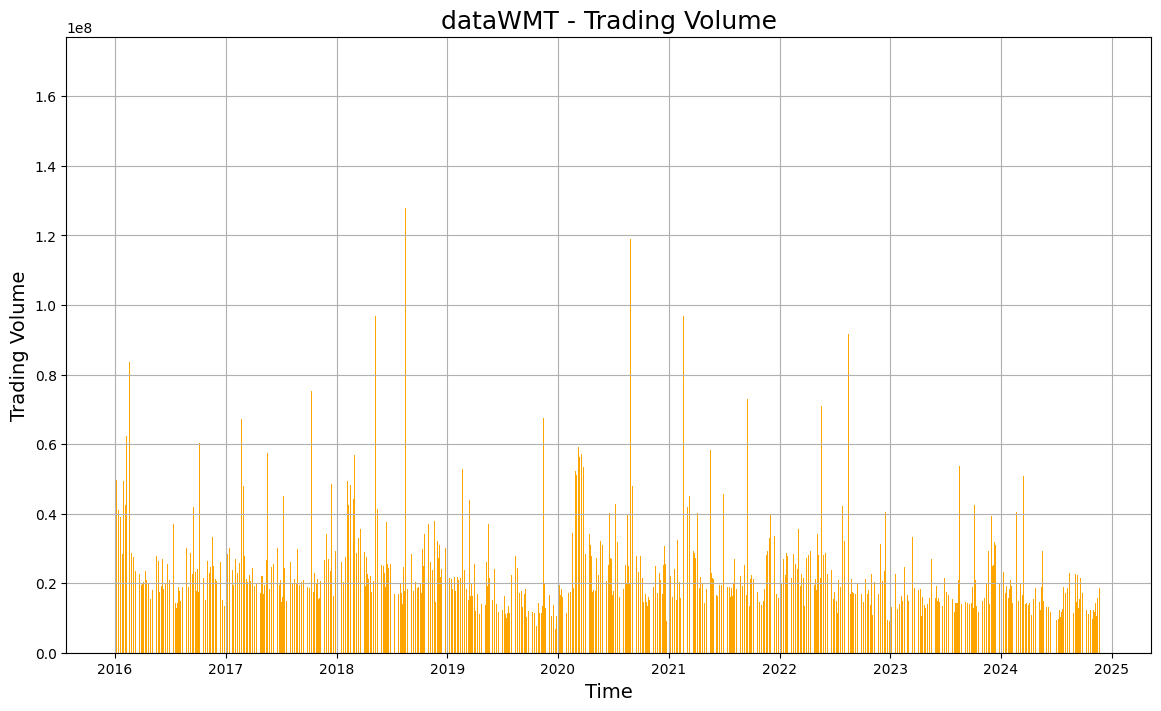

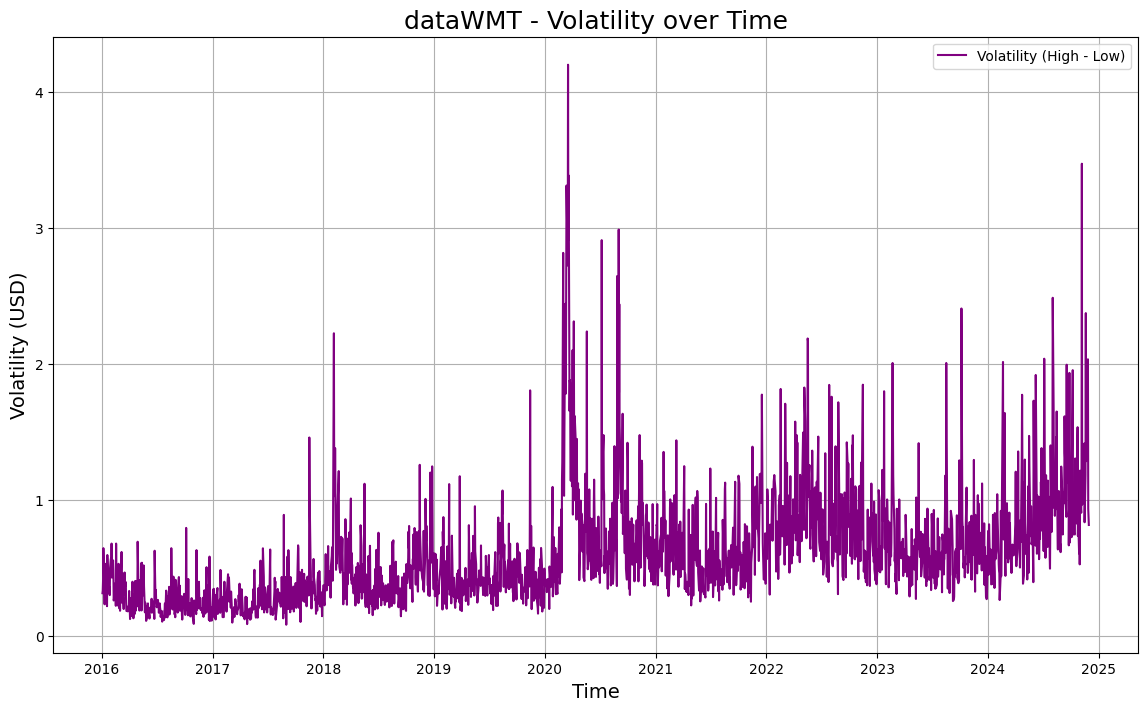


EDA for dataJPM.csv:
              Open         High          Low        Close        Volume
count  2243.000000  2243.000000  2243.000000  2243.000000  2.243000e+03
mean    111.536098   112.589660   110.510319   111.569679  1.377724e+07
std      42.070184    42.425719    41.749412    42.113621  6.597205e+06
min      42.278523    42.286366    41.180379    41.627480  3.220500e+06
25%      84.320778    85.448997    83.222644    84.473930  9.388200e+06
50%     101.143530   101.859568    99.524287   100.780212  1.229290e+07
75%     138.211502   139.505004   137.070634   138.124565  1.597285e+07
max     250.490005   254.309998   249.449997   250.289993  5.619230e+07
<class 'pandas.core.frame.DataFrame'>
Index: 2243 entries, 2016-01-04 00:00:00-05:00 to 2024-11-29 00:00:00-05:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2243 non-null   float64
 1   High    2243 non-null   float64
 2   Low     2243 non-null   float64

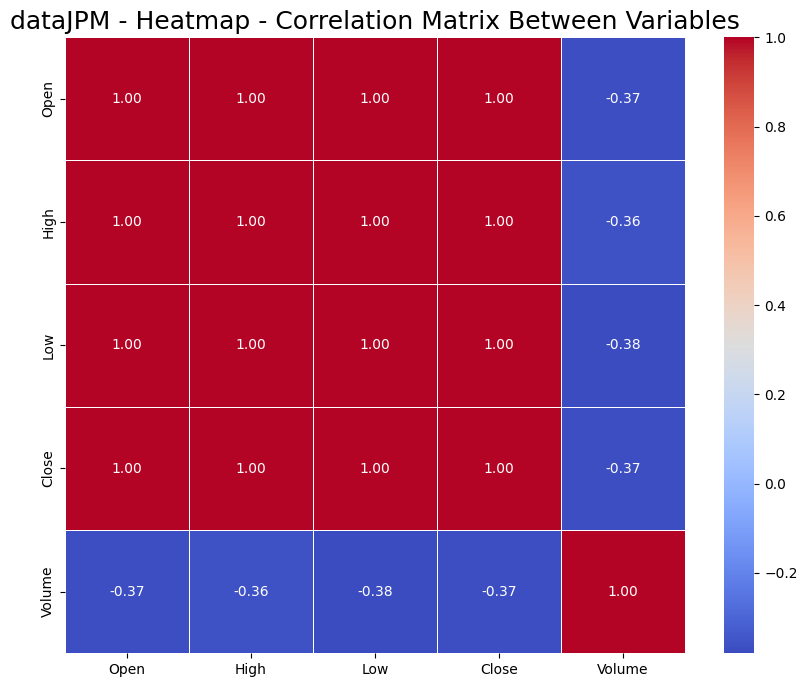

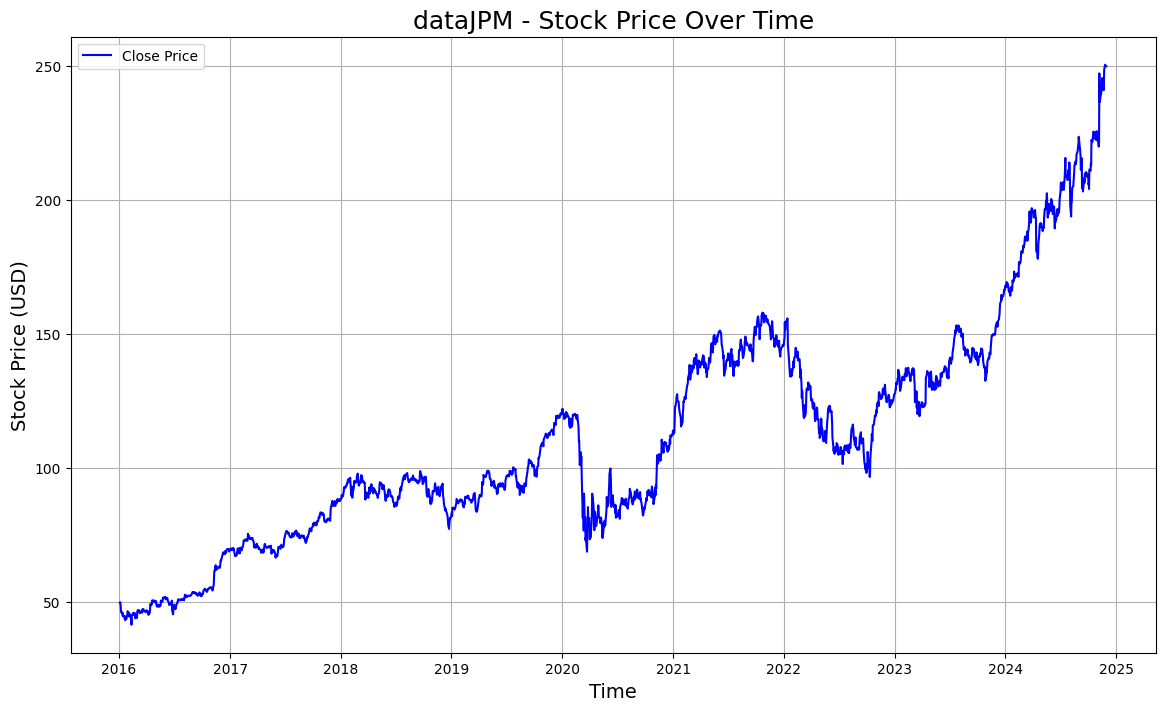

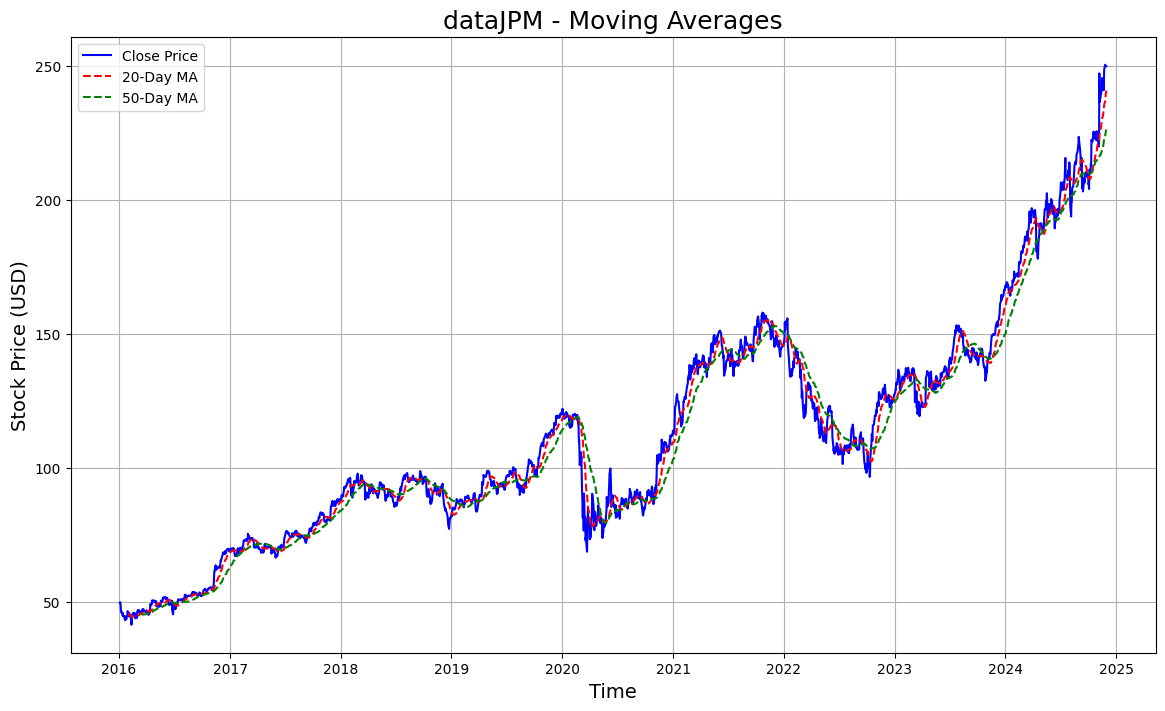

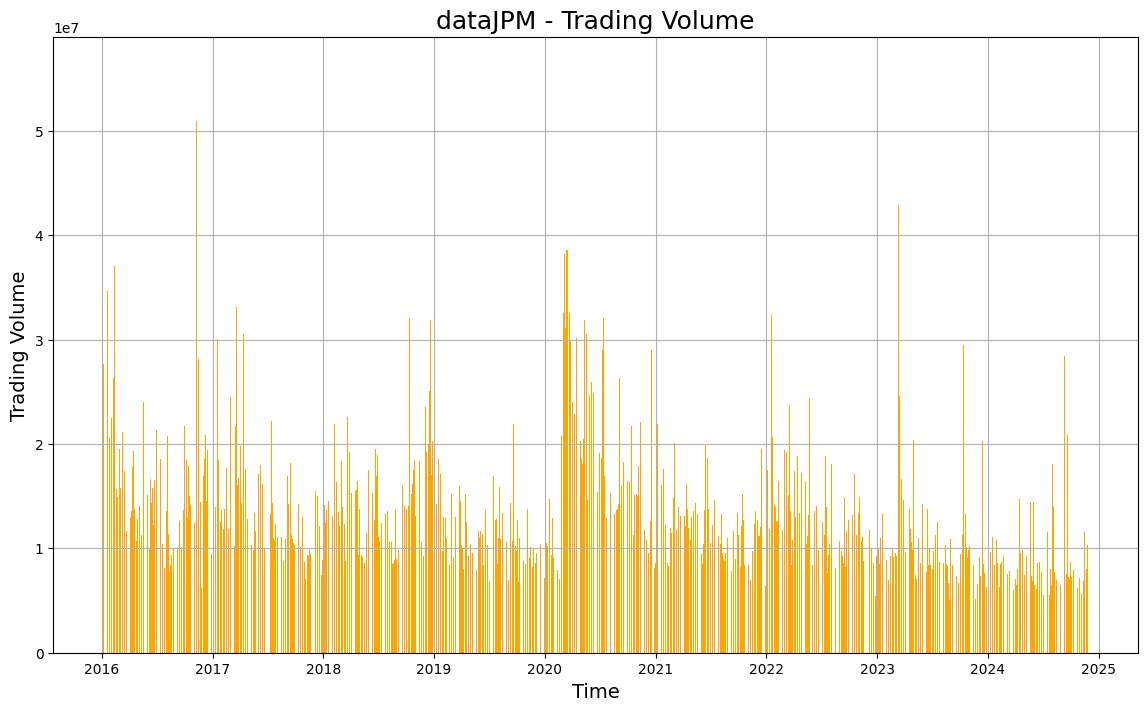

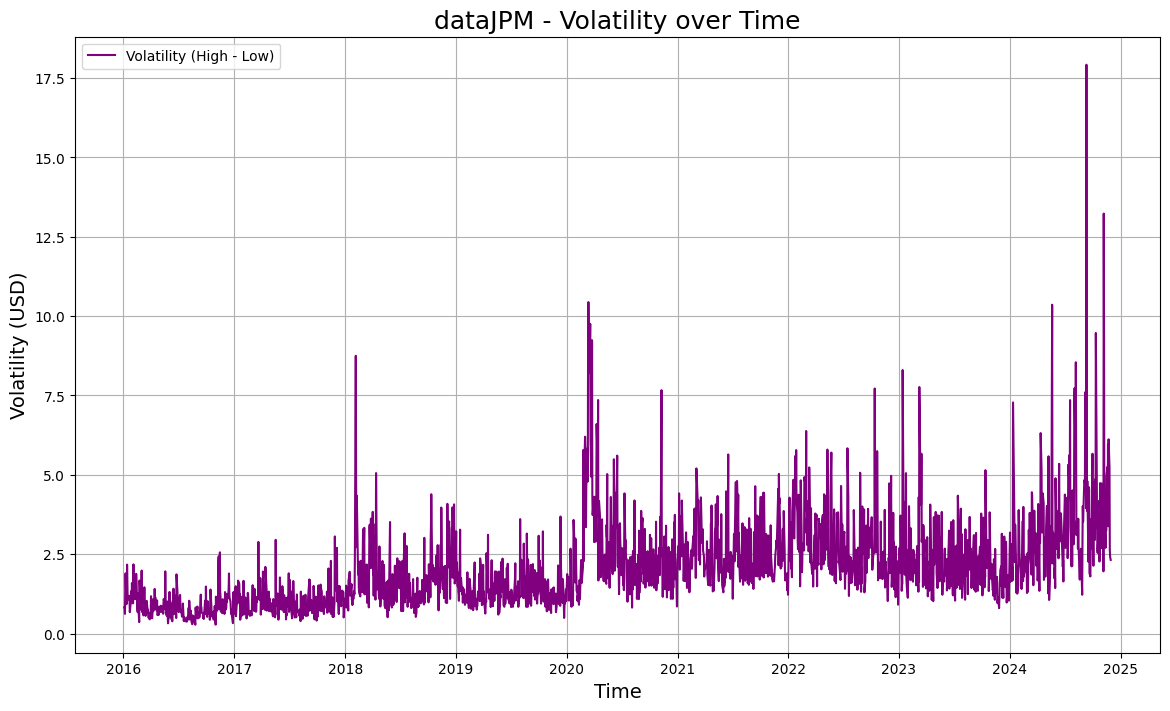


EDA for dataNFLX.csv:
              Open         High          Low        Close        Volume
count  2243.000000  2243.000000  2243.000000  2243.000000  2.243000e+03
mean    357.904494   363.145858   352.566768   358.003330  7.875554e+06
std     173.284856   175.229955   171.331803   173.337524  6.584330e+06
min      80.570000    84.699997    79.949997    82.790001  1.144000e+06
25%     202.070000   206.630005   198.184998   204.529999  4.088750e+06
50%     349.899994   355.799988   343.899994   349.730011  6.036100e+06
75%     490.044998   496.054993   483.294998   489.349991  9.363450e+06
max     902.049988   908.000000   893.000000   897.789978  1.333875e+08
<class 'pandas.core.frame.DataFrame'>
Index: 2243 entries, 2016-01-04 00:00:00-05:00 to 2024-11-29 00:00:00-05:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2243 non-null   float64
 1   High    2243 non-null   float64
 2   Low     2243 non-null   float6

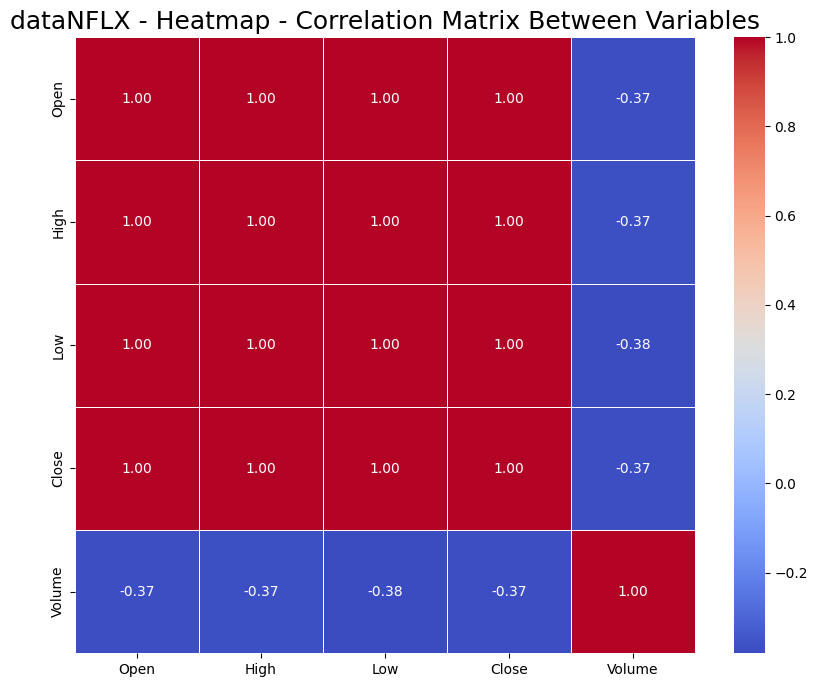

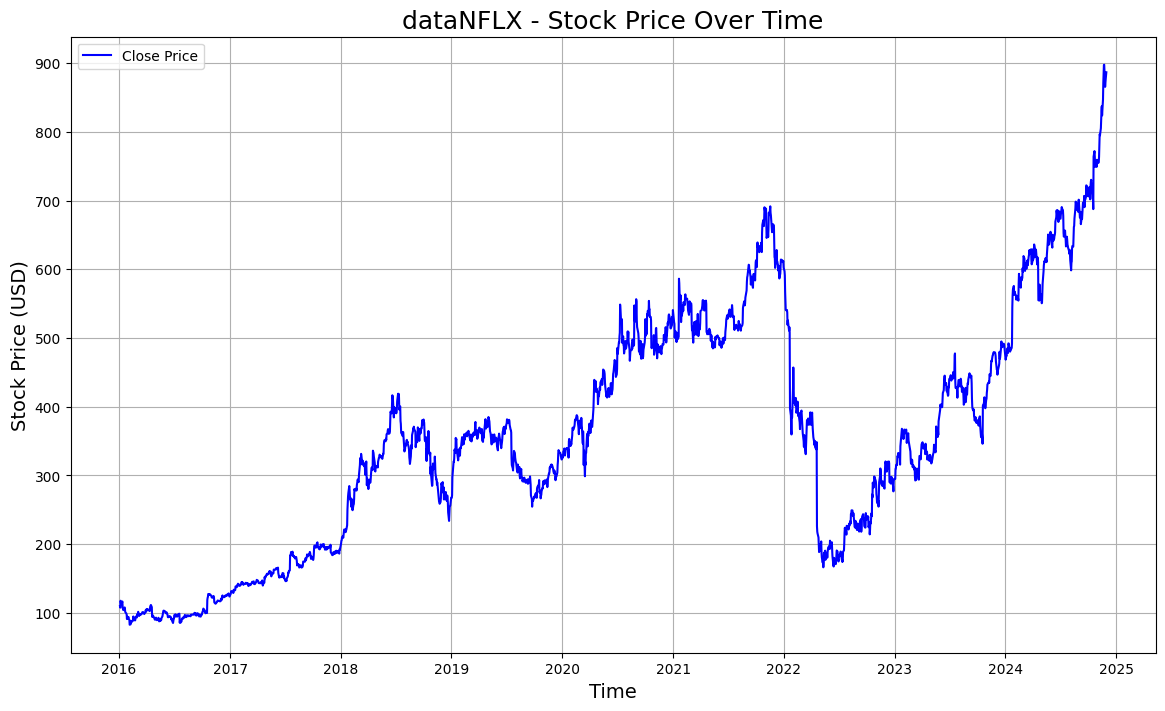

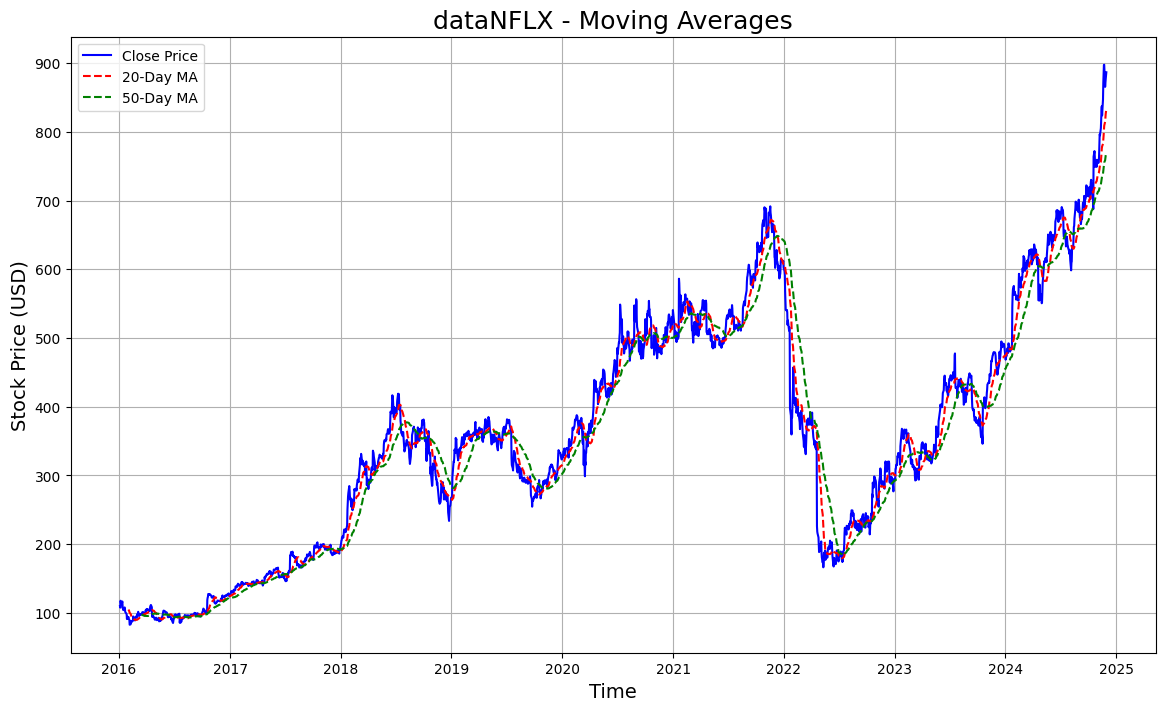

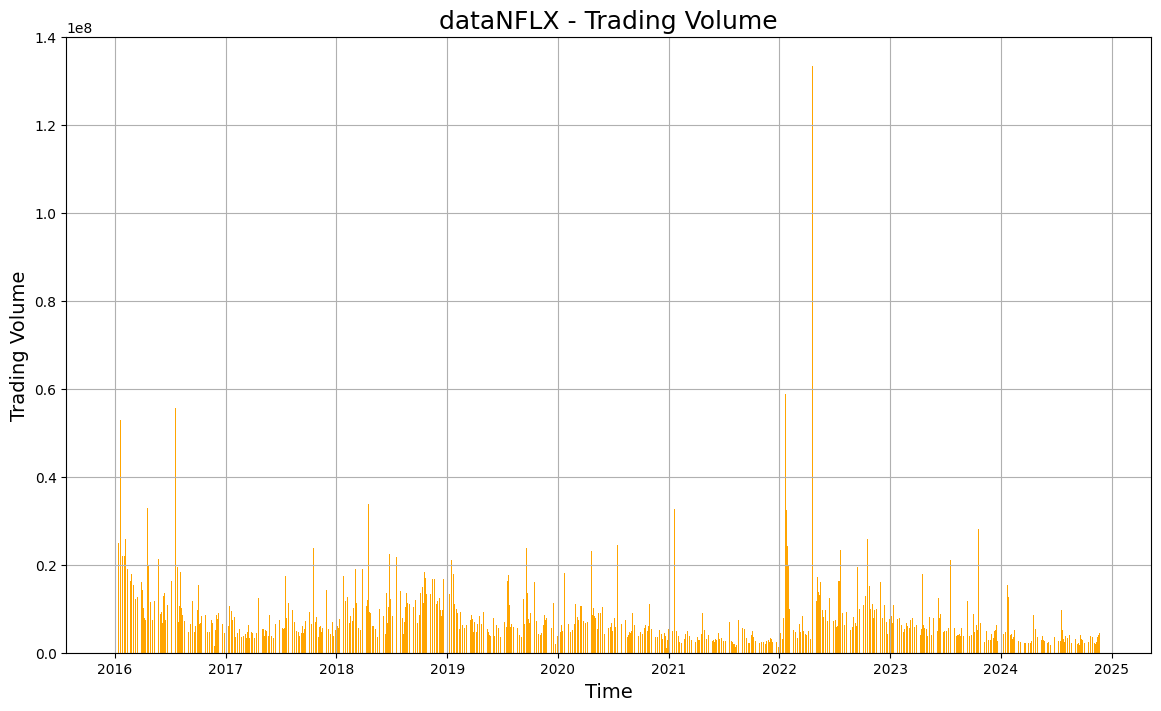

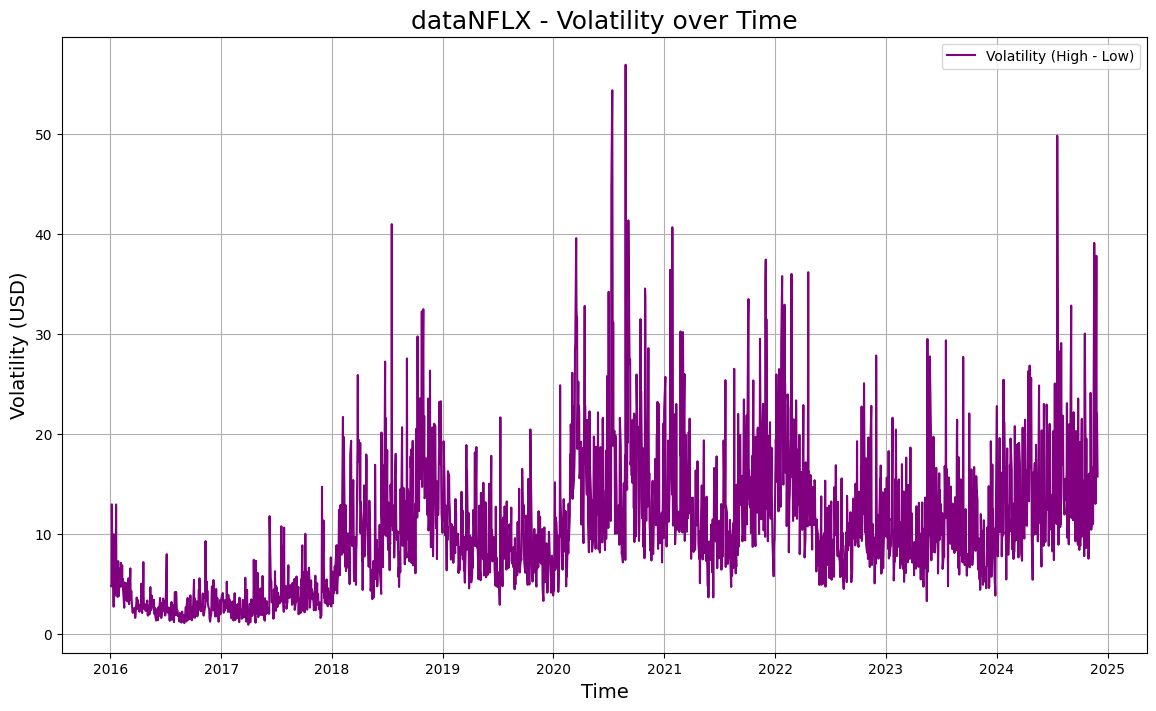

In [42]:
tickers = ["AMZN", "AAPL", "NVDA", "MSFT", "GOOG", "META", "TSLA", "WMT", "JPM", "NFLX"]
for ticker in tickers:
    perform_eda(f'data{ticker}.csv')
